In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style


import warnings
warnings.filterwarnings("ignore")

In [2]:
#
#/opt/homebrew/bin/python3 -m pip install ipykernel -U --user --force-reinstall

### 1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
spark_df = pd.read_csv('Sparkling.csv',parse_dates=True,index_col=0)
spark_df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
rose_df = pd.read_csv('Rose.csv',parse_dates=True,index_col=0)
rose_df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [5]:
print("Sparkling shape", spark_df.shape)
print("Rose shape", rose_df.shape)

Sparkling shape (187, 1)
Rose shape (187, 1)


In [6]:
print("Sparking info", spark_df.info())
print("Rose info", rose_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB
Sparking info None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
Rose info None


In [7]:
spark_df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [8]:
rose_df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

### Checking for any  missing values

In [9]:
spark_df.isnull().sum()

Sparkling    0
dtype: int64

In [10]:
rose_df.isnull().sum()

Rose    2
dtype: int64

### There are two missing values in Rose dataset, because this a time series data the missing value has to continue the series. 

### we can interpolate the missing values. The function, interpolate() of pandas library is used to interpolate the missing values. We use a linear interpolation which draws a straight line between available data, on the first day of the month and fills in values at the chosen frequency from this line

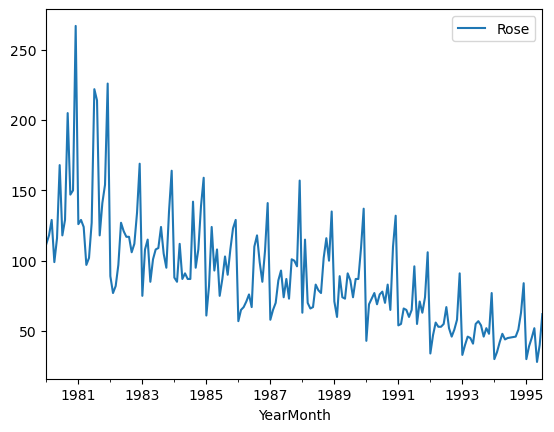

In [11]:
interpolated = rose_df.interpolate(method = 'linear')
interpolated.plot()
plt.show()

In [12]:
rose_df = rose_df.interpolate()
rose_df.isna().sum()

Rose    0
dtype: int64

### EDA

### Plotting time series of Sparkling and Rose dataset

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] =  15,7

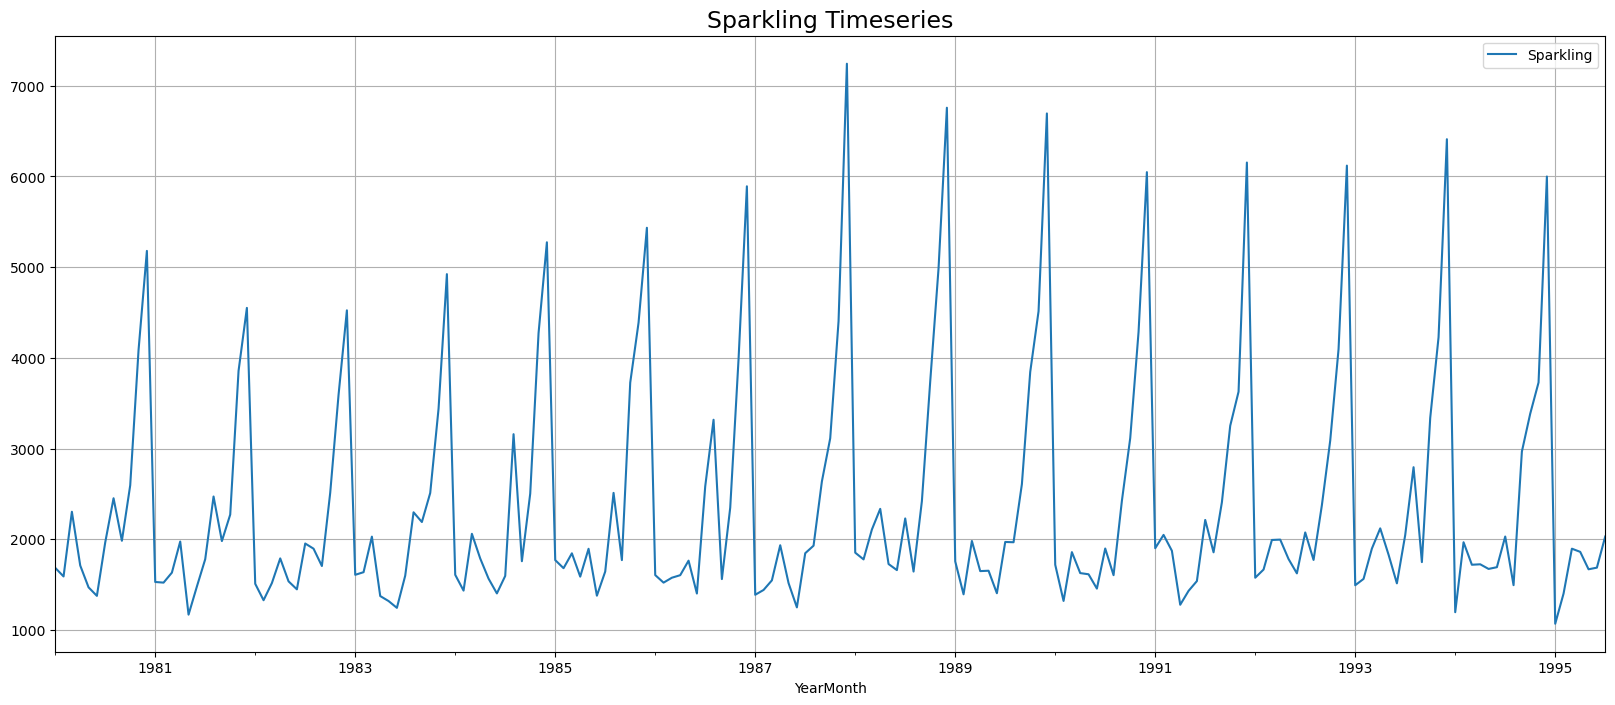

In [14]:
spark_df.plot(figsize=(20,8))
plt.grid();
plt.title('Sparkling Timeseries', fontsize=17);
plt.savefig('Sparkling_time_plot.jpg', bbox_inches='tight');

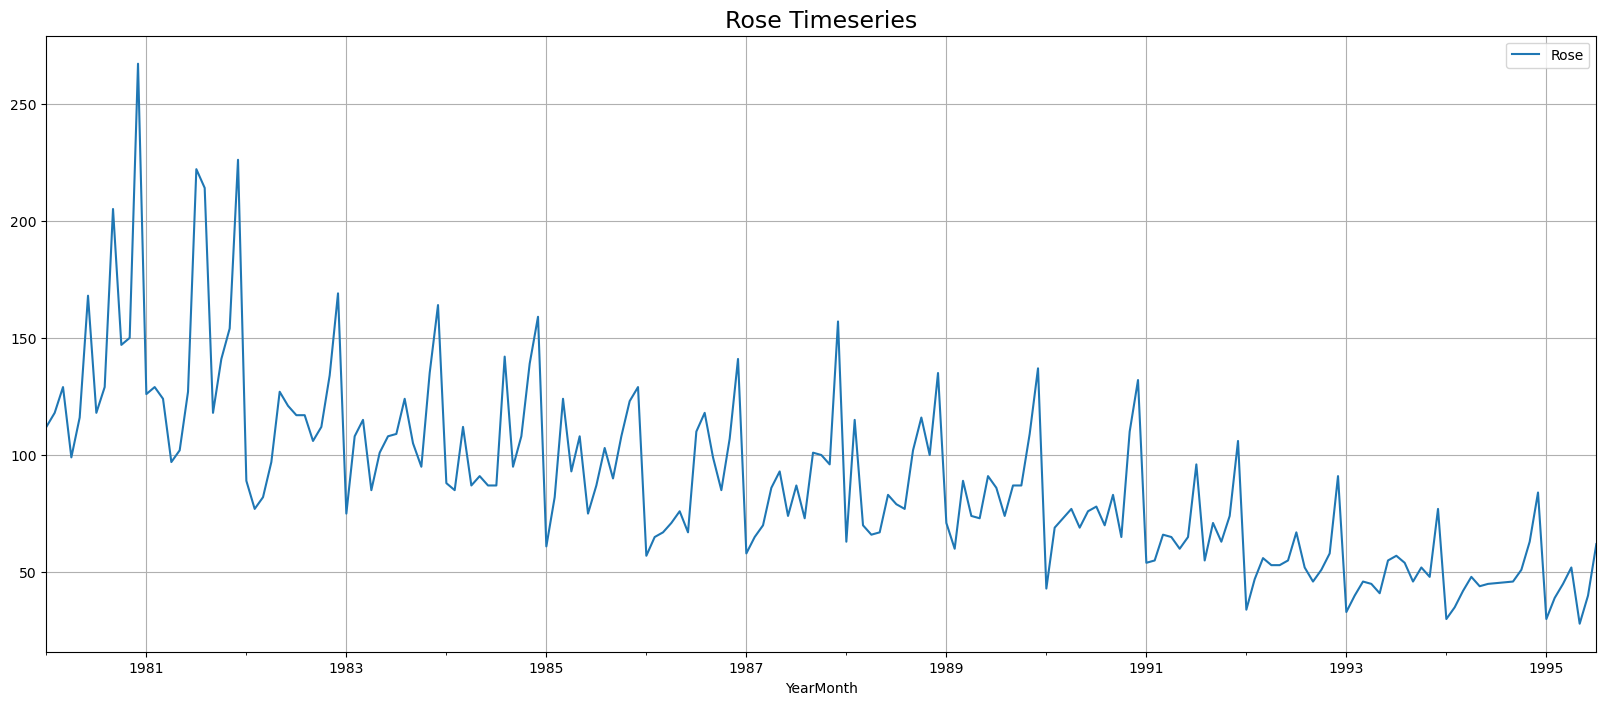

In [15]:
rose_df.plot(figsize=(20,8))
plt.grid();
plt.title('Rose Timeseries', fontsize=17);
plt.savefig('Rose_time_plot.jpg', bbox_inches='tight');

### Yearly boxplot of Sparkling

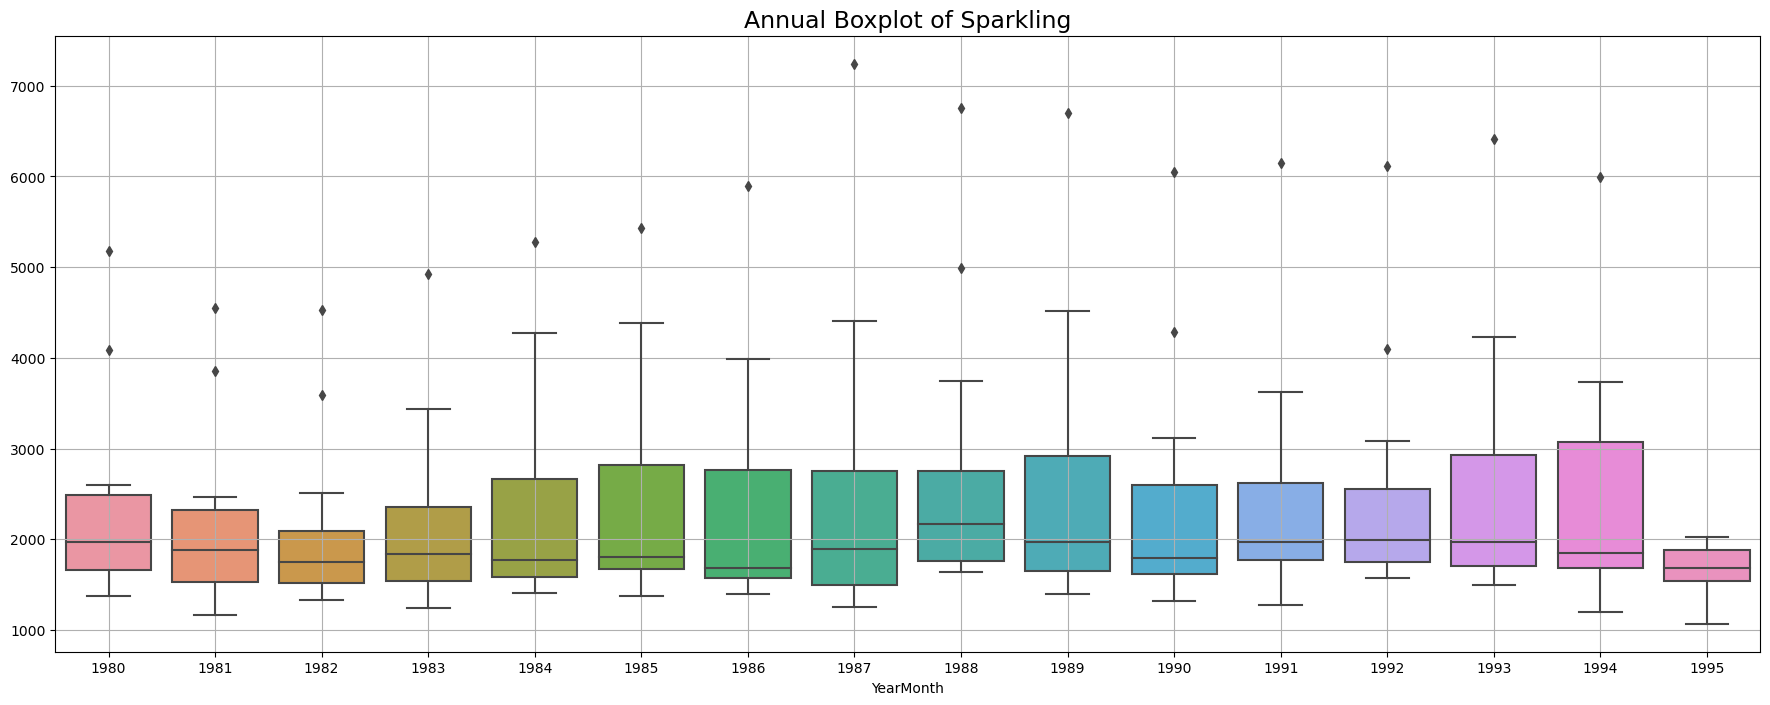

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = spark_df.index.year,y = spark_df.values[:,0],ax=ax)
plt.grid();
plt.title('Annual Boxplot of Sparkling', fontsize=17);
plt.savefig('Annual_Sparkling_box.jpg', bbox_inches='tight');

### Yearly boxplot of Rose

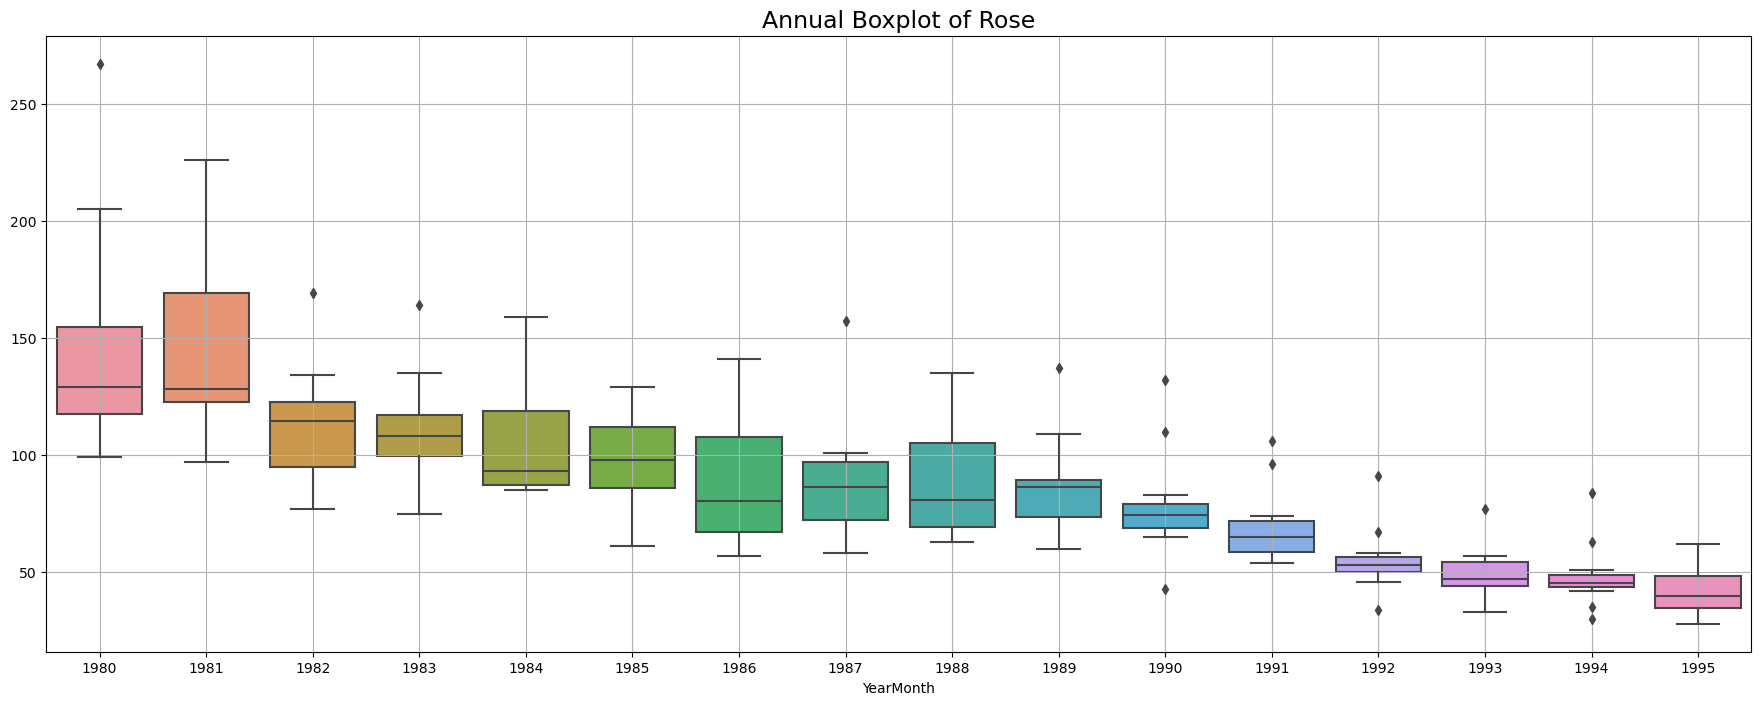

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose_df.index.year,y = rose_df.values[:,0],ax=ax)
plt.grid();
plt.title('Annual Boxplot of Rose', fontsize=17);
plt.savefig('Annual_rose_box.jpg', bbox_inches='tight');

### Month-wise boxplot of Sparkling

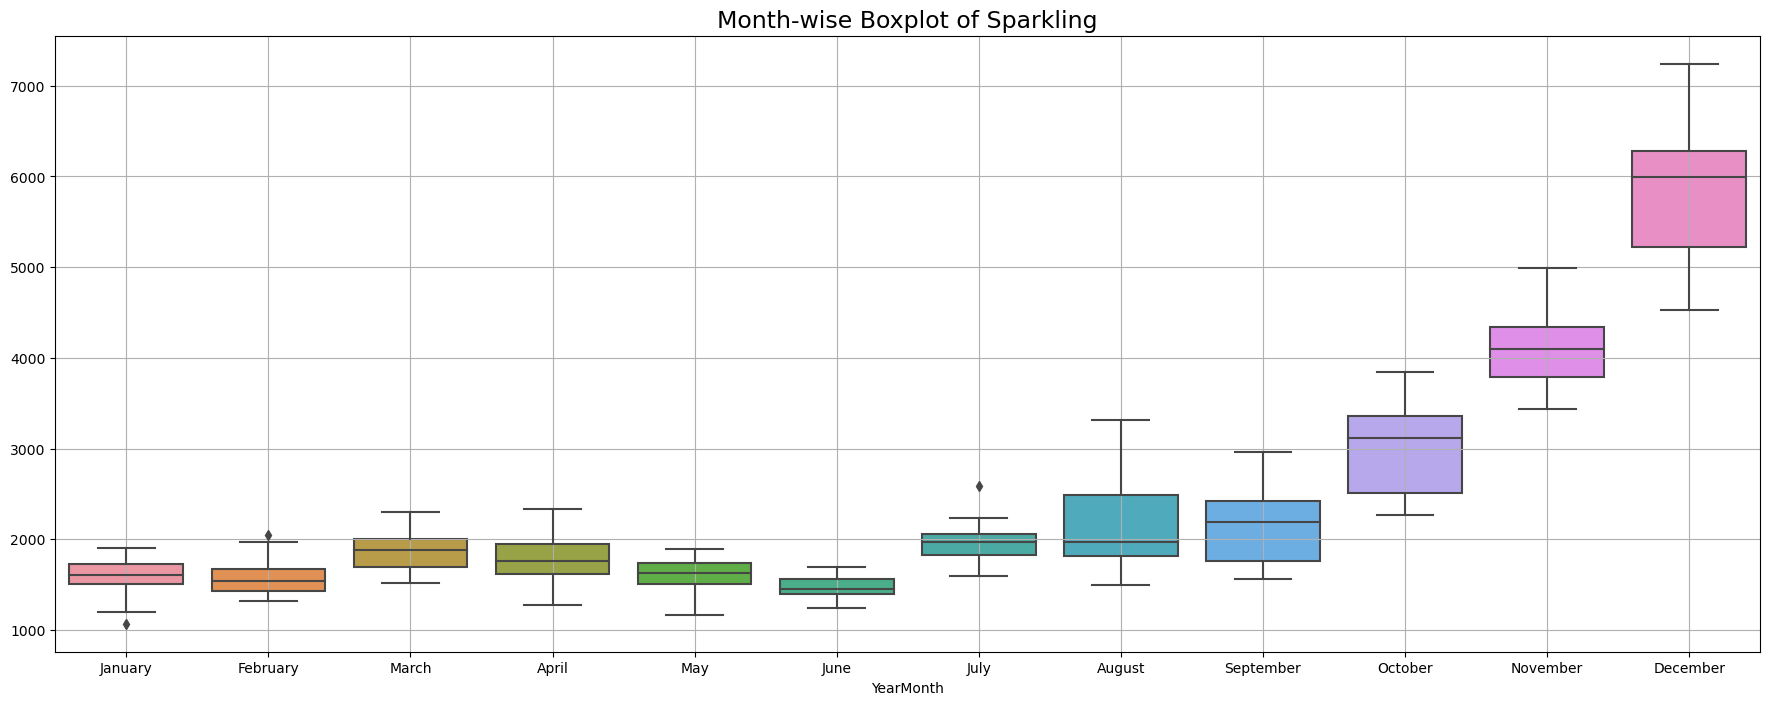

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = spark_df.index.month_name(),y = spark_df.values[:,0],ax=ax)
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('Month_wise_sparkling_box.jpg', bbox_inches='tight');

### Month-wise boxplot of Rose

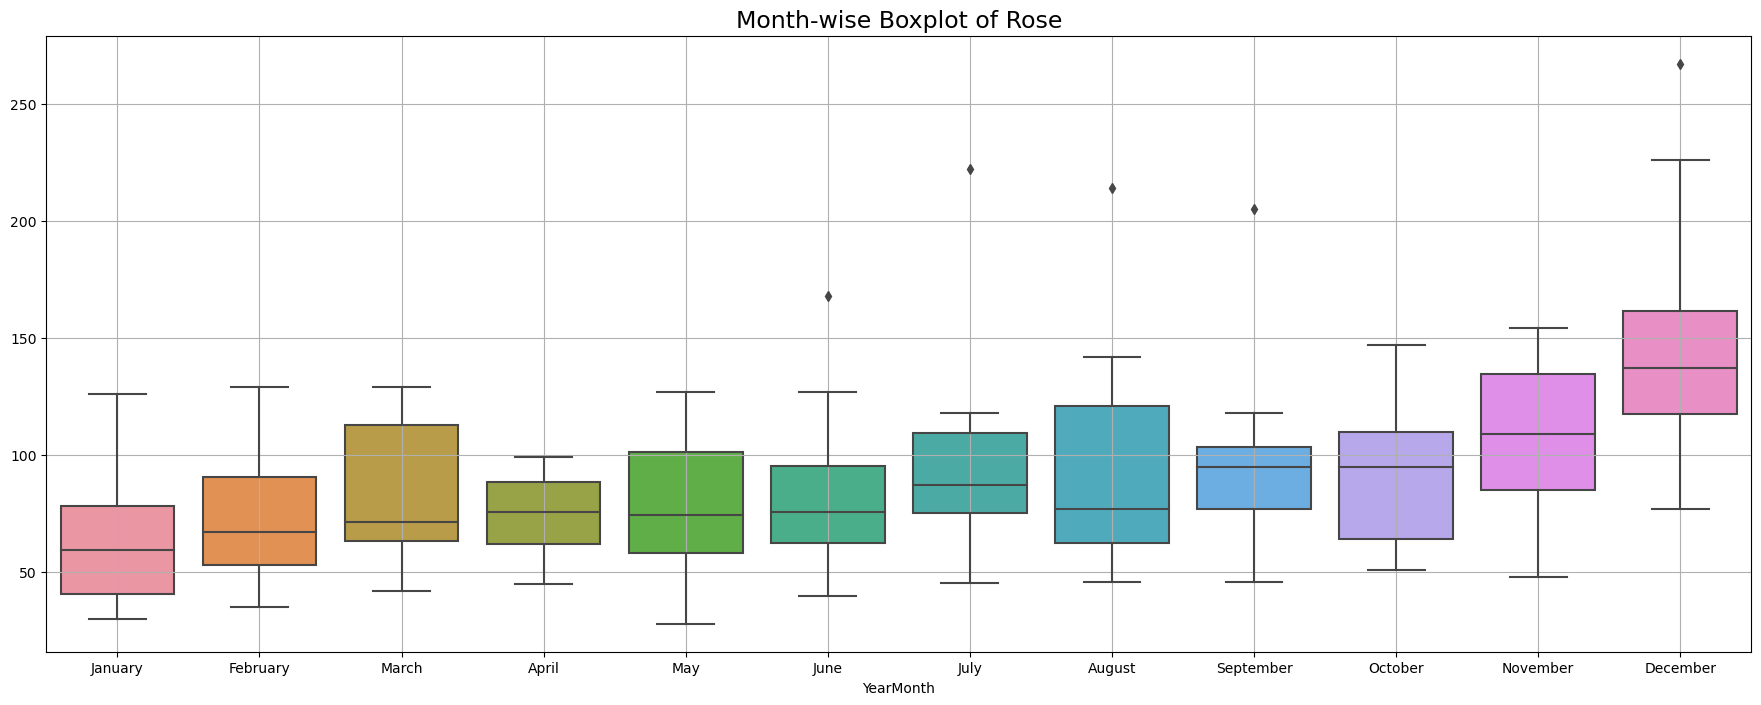

In [19]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose_df.index.month_name(),y = rose_df.values[:,0],ax=ax)
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);
plt.savefig('Month_wise_rose_box.jpg', bbox_inches='tight');

### Monthly Sales across years for Sparkling

In [20]:
monthly_sales_across_years = pd.pivot_table(spark_df, values = 'Sparkling', columns = spark_df.index.month_name(), index = spark_df.index.year)
monthly_sales_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

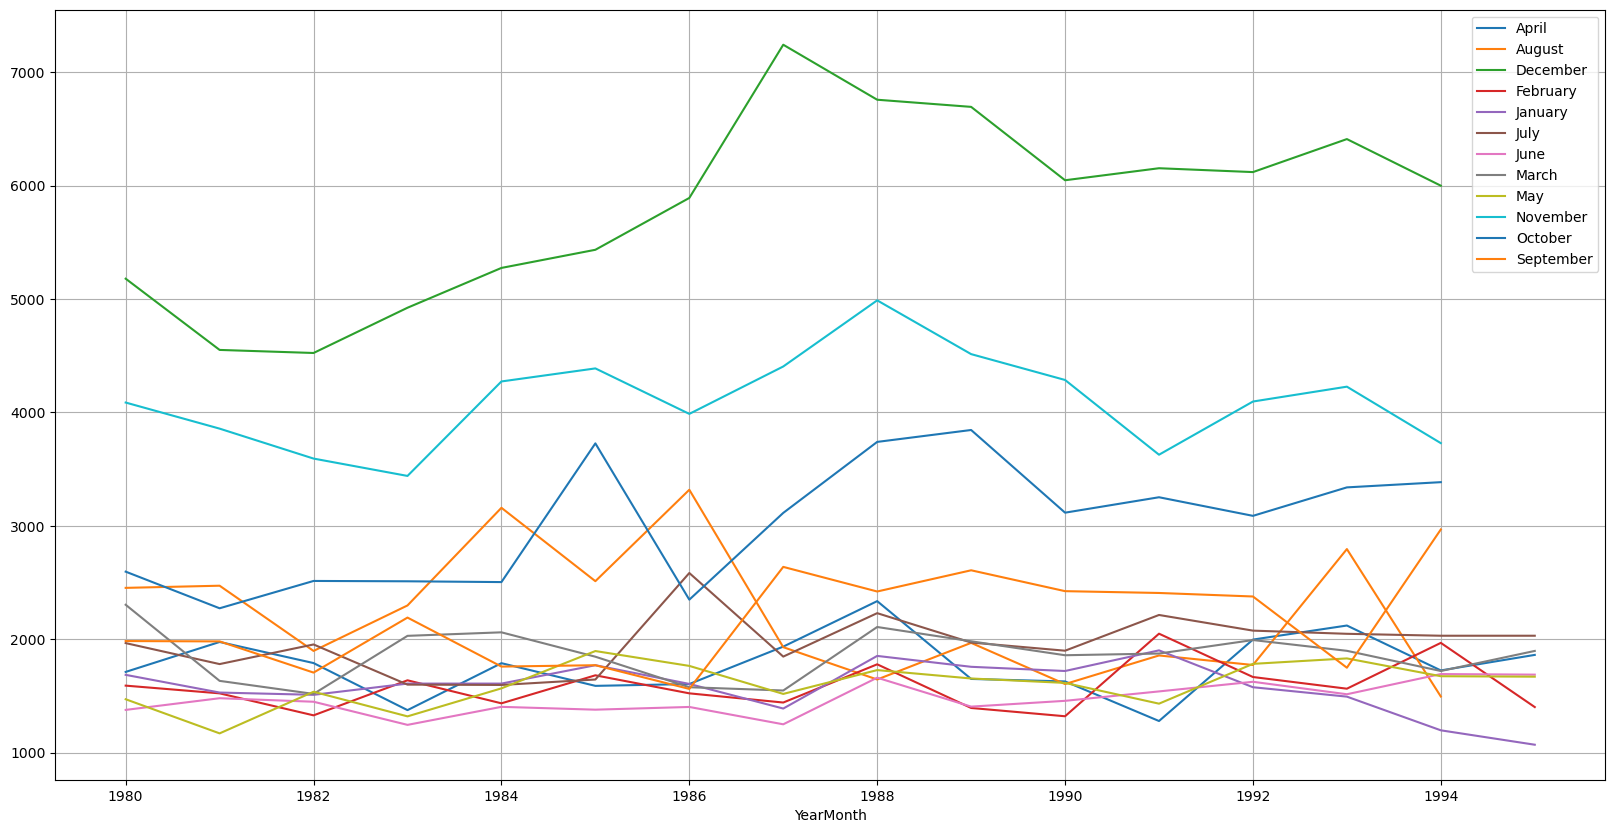

In [21]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Monthly Sales across years for Rose

In [22]:
monthly_sales_across_years = pd.pivot_table(rose_df, values = 'Rose', columns = rose_df.index.month_name(), index = rose_df.index.year)
monthly_sales_across_years

YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

YearMonth  March    May  November  October  September  
YearMonth                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

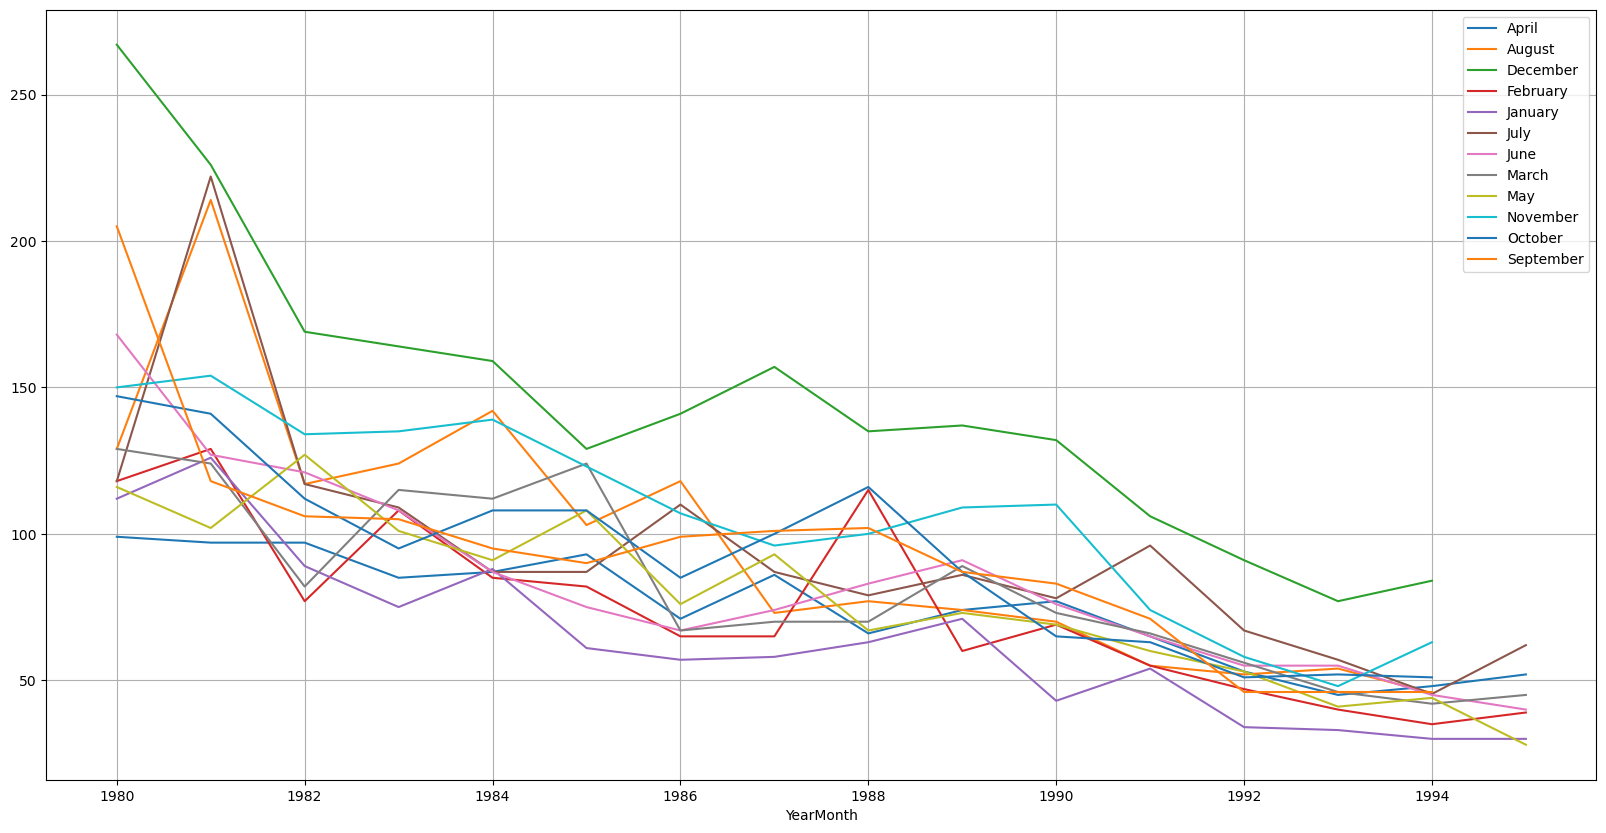

In [23]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Decompose the Time Series for Sparkling

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

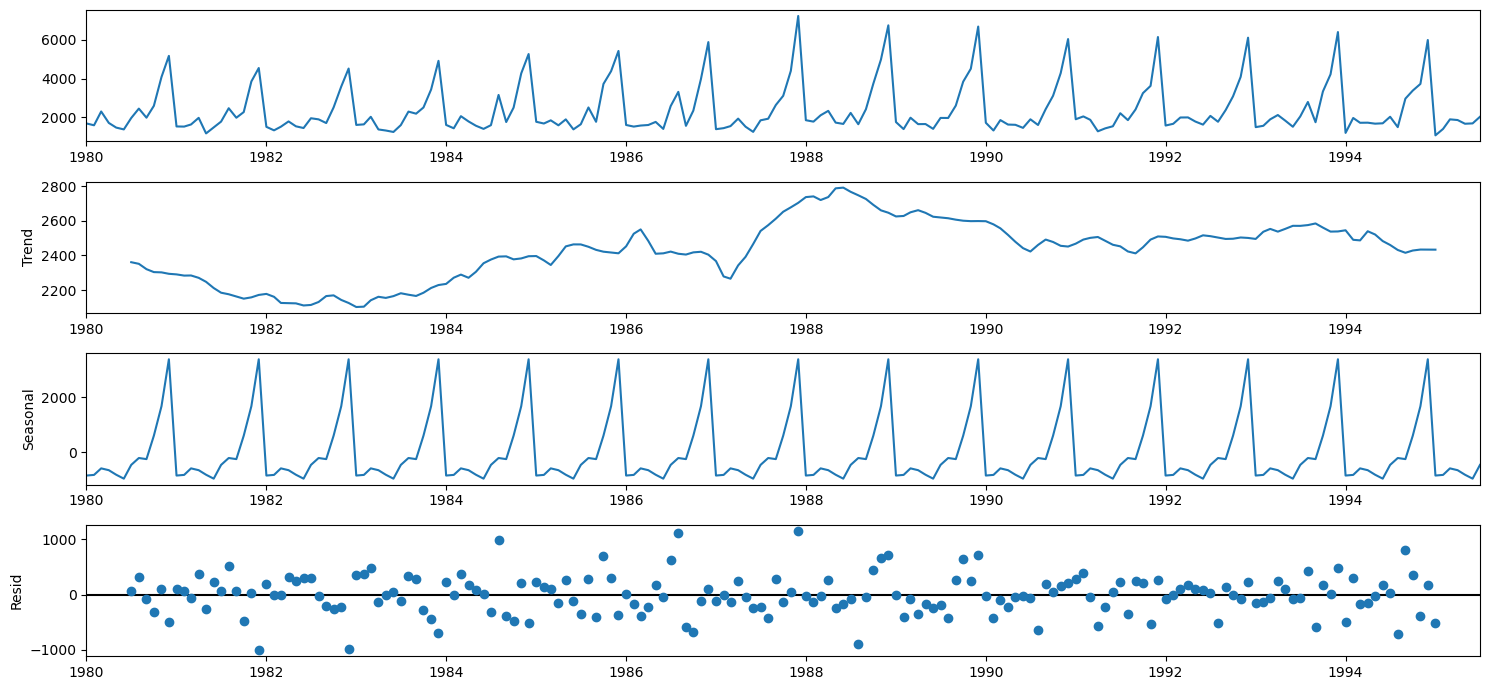

In [25]:
decomposition = seasonal_decompose(spark_df,model='additive')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
1980-06-01   -967.434011
1980-07-01   -465.502265
1980-08-01   -214.332821
1980-09-01   -254.677265
1980-10-01    599.769957
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290
Name: resid, dtype: float64 



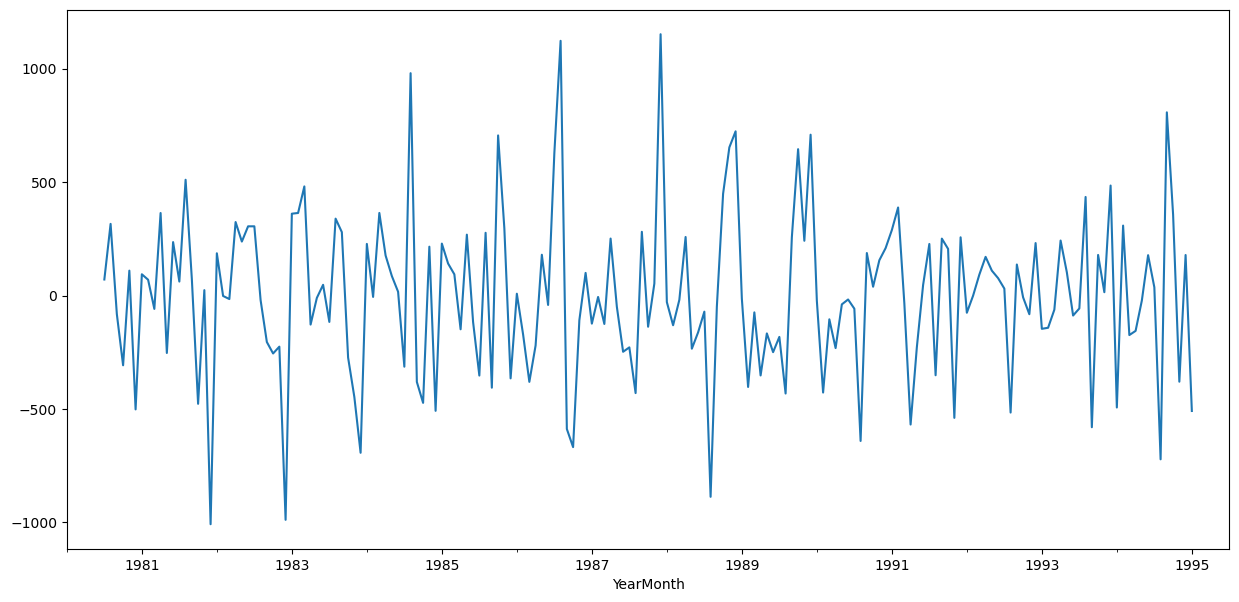

In [27]:
residual.plot();

In [28]:
cvsa = residual.std()/residual.mean()
cvsa

-296.0833529414326

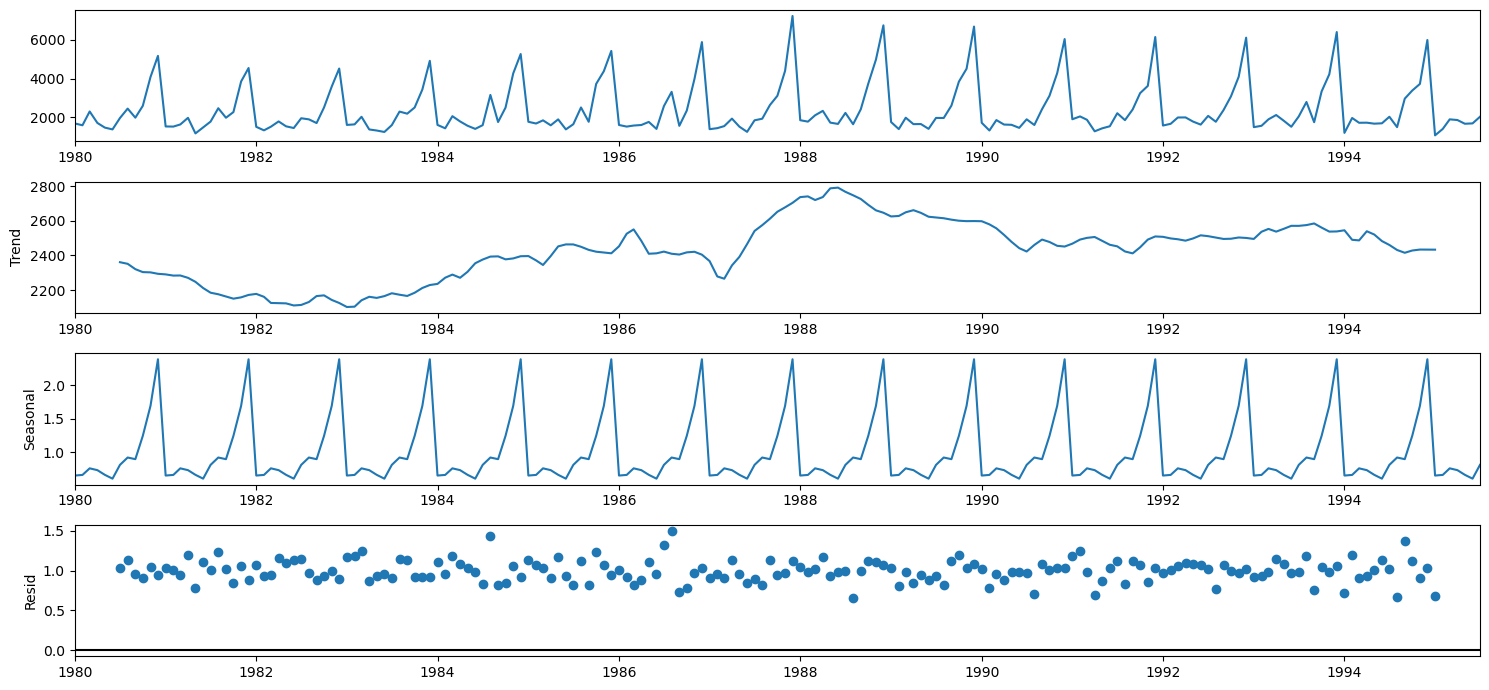

In [29]:
decomposition = seasonal_decompose(spark_df,model='multiplicative')
decomposition.plot();

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
Name: resid, dtype: float64 



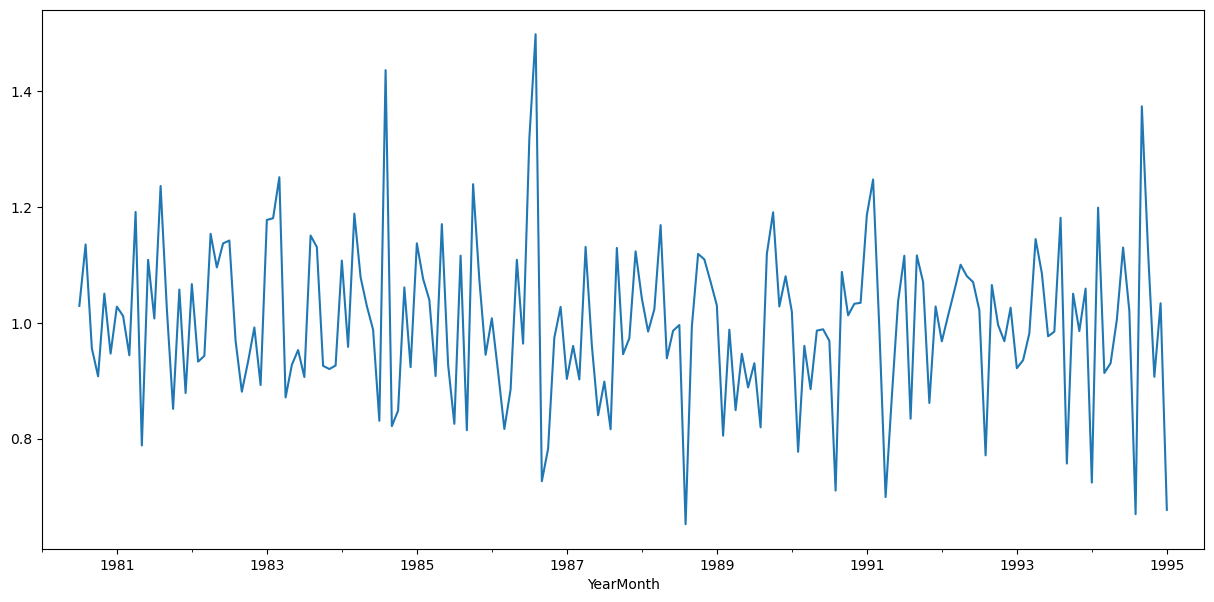

In [31]:
residual.plot();

In [32]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828966

### Decompose the Time Series for Rose

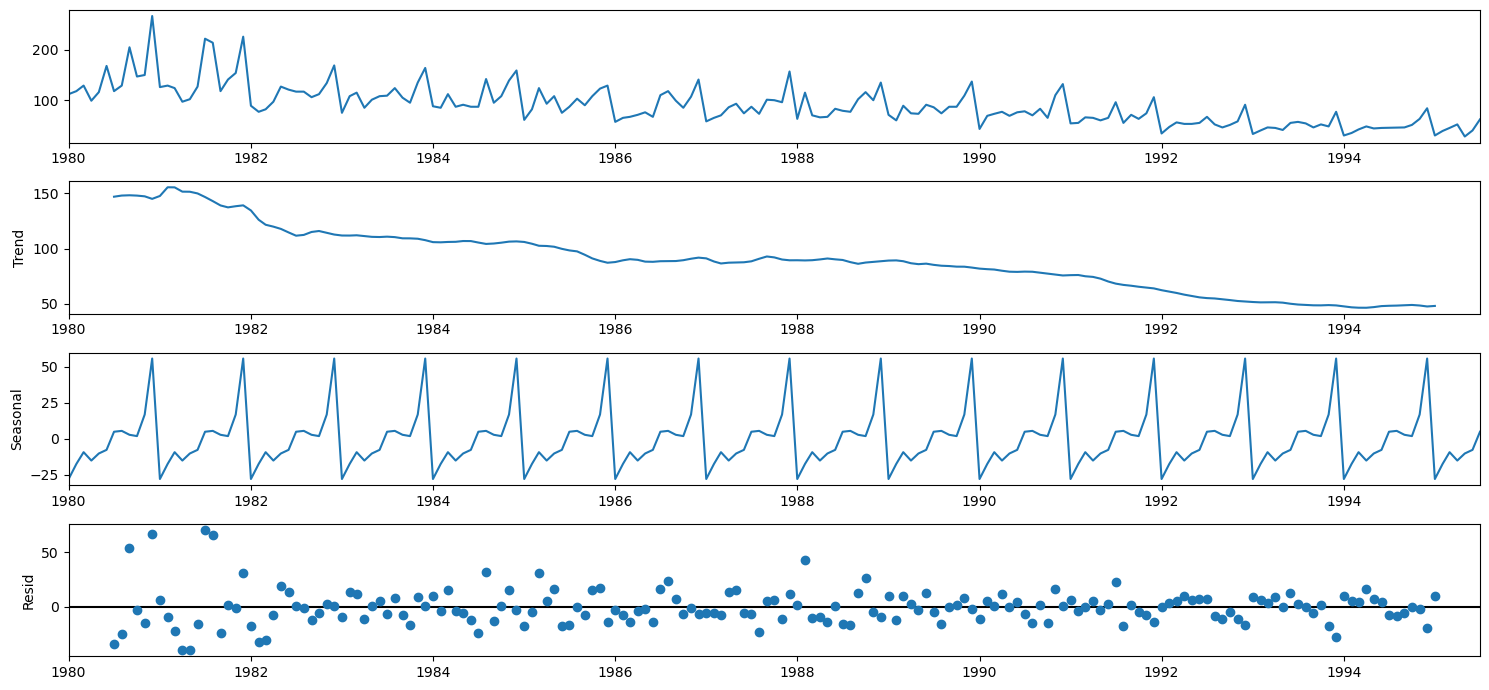

In [33]:
decomposition = seasonal_decompose(rose_df,model='additive')
decomposition.plot();

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
Name: resid, dtype: float64 



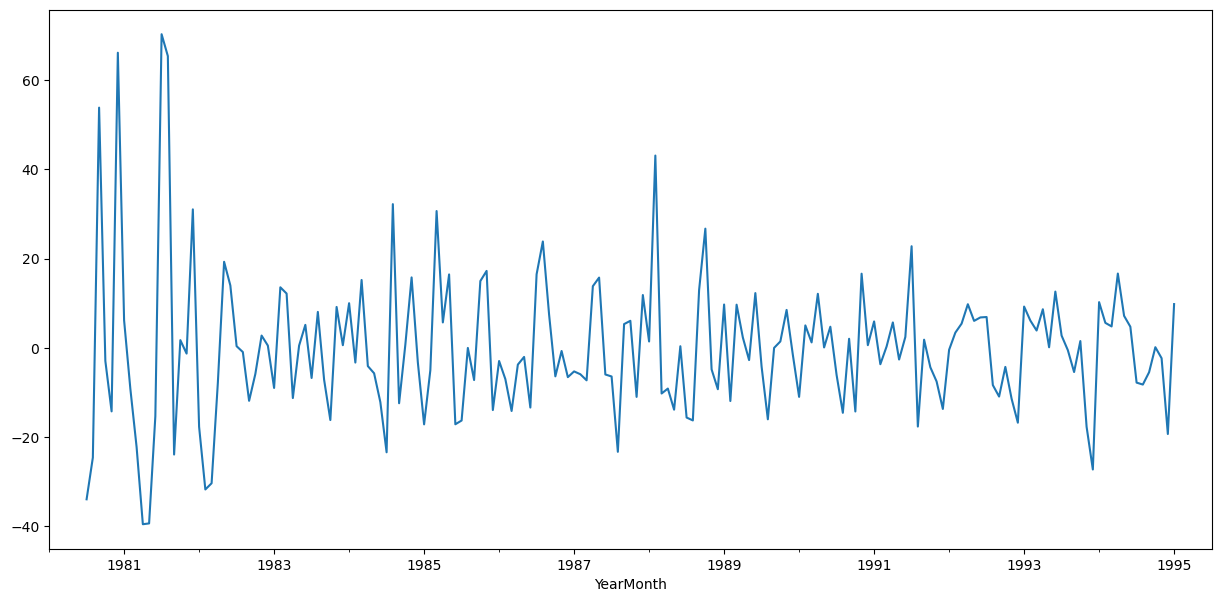

In [35]:
residual.plot();

In [36]:
cvra = residual.std()/residual.mean()
cvra

-204.4380479624139

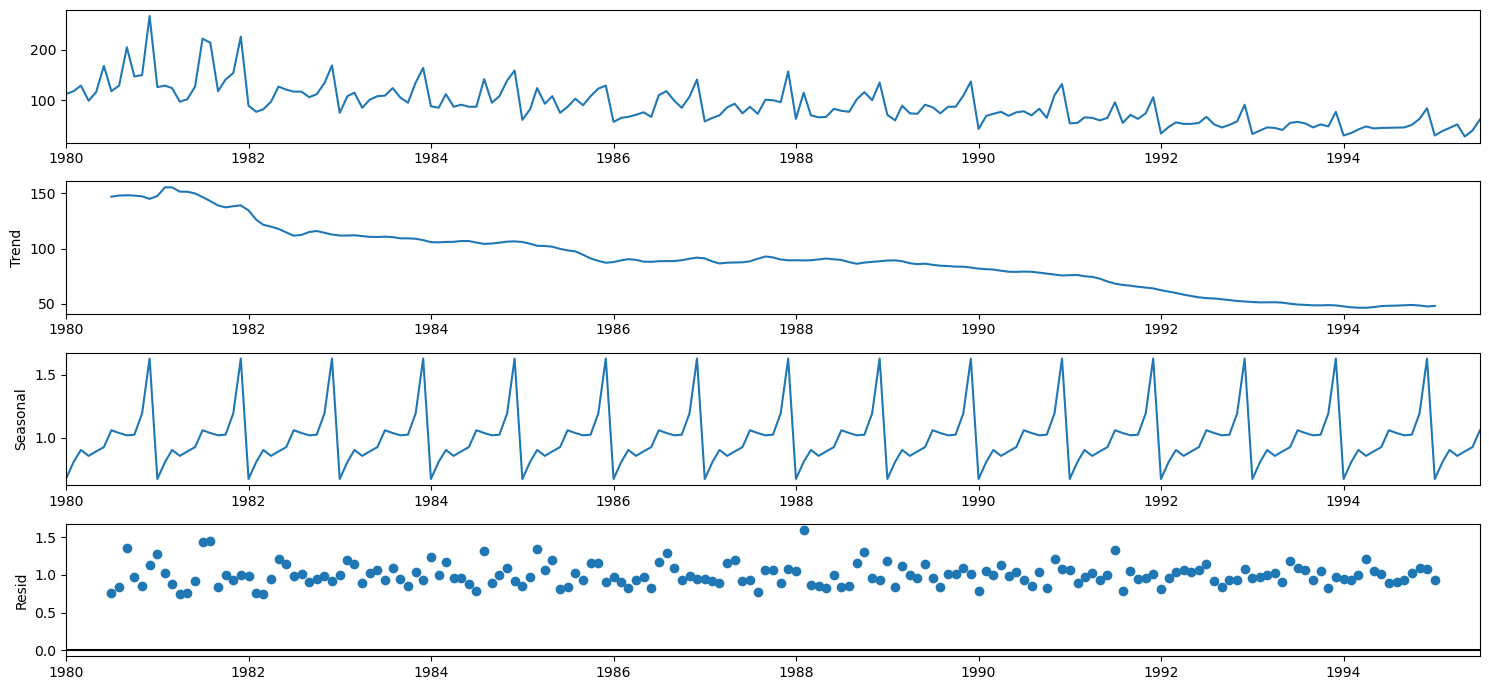

In [37]:
decomposition = seasonal_decompose(rose_df,model='multiplicative')
decomposition.plot();

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
Name: resid, dtype: float64 



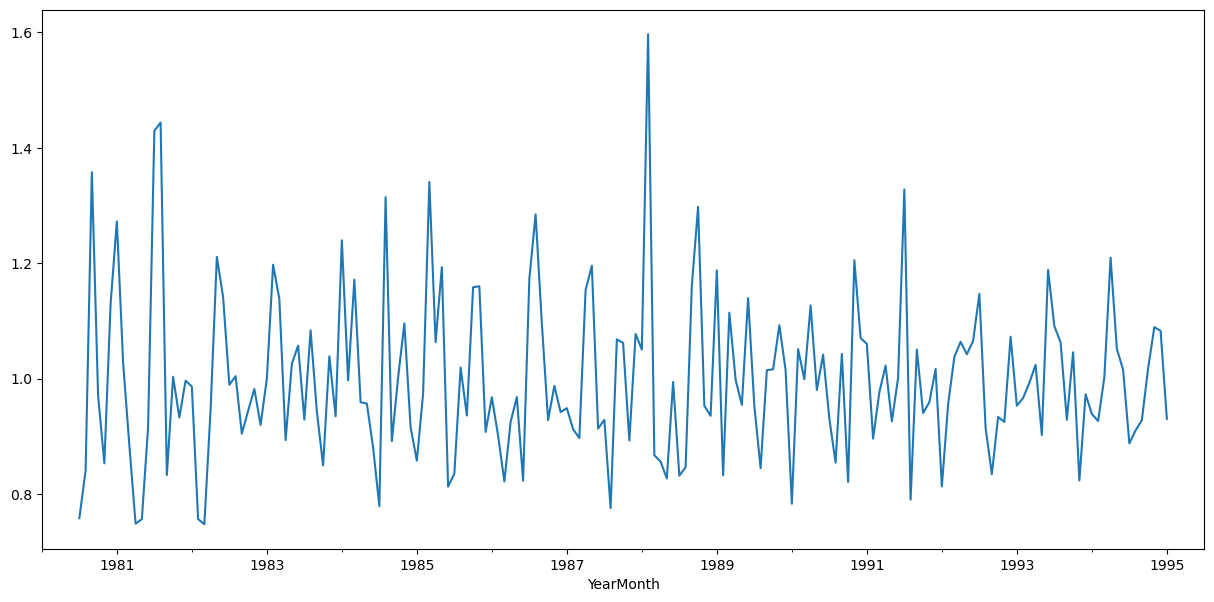

In [39]:
residual.plot();

In [40]:
cvrm = residual.std()/residual.mean()
cvrm

0.1435912418613803

### Test Train Split

In [41]:
spark_train_df=spark_df[spark_df.index.year < 1991]
spark_test_df=spark_df[spark_df.index.year >= 1991]

In [42]:
print("Shape of train", spark_train_df.shape)
print("Shape of test", spark_test_df.shape)
print("First 5 rows on train", spark_train_df.head())
print("First 5 rows on test", spark_test_df.head())
print("Last 5 rows on train", spark_train_df.tail())
print("Last 5 rows on test", spark_test_df.tail())

Shape of train (132, 1)
Shape of test (55, 1)
First 5 rows on train             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
First 5 rows on test             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432
Last 5 rows on train             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047
Last 5 rows on test             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


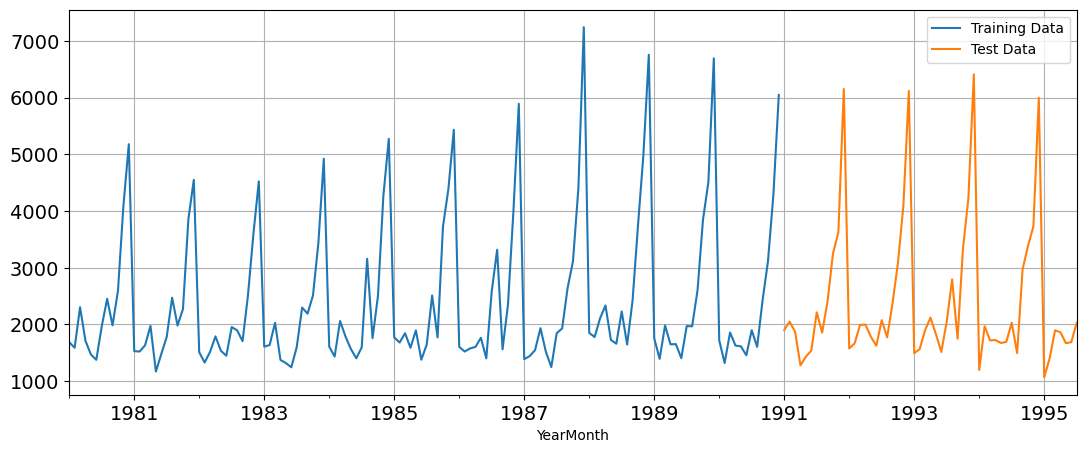

In [43]:
spark_train_df['Sparkling'].plot(figsize=(13,5), fontsize=14)
spark_test_df['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [44]:
spark_train_time = [i+1 for i in range(len(spark_train_df))]
spark_test_time = [i+43 for i in range(len(spark_test_df))]
print('Training Time instance','\n',spark_train_time)
print('Test Time instance','\n',spark_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [45]:
LinearRegression_train_spark = spark_train_df.copy()
LinearRegression_test_spark = spark_test_df.copy()



LinearRegression_train_spark['time'] = spark_train_time
LinearRegression_test_spark['time'] = spark_test_time

print('First few rows of Training Data','\n',LinearRegression_train_spark.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_spark.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_spark.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_spark.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902    43
1991-02-01       2049    44
1991-03-01       1874    45
1991-04-01       1279    46
1991-05-01       1432    47 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897    93
1995-04-01       1862    94
1995-05-01       1670    95
1995-06-01       1688    96
1995-07-01       2031    97 



In [46]:
rose_train_df=rose_df[rose_df.index.year < 1991]
rose_test_df=rose_df[rose_df.index.year >= 1991]

In [47]:
print("Shape of train", rose_train_df.shape)
print("Shape of test", rose_test_df.shape)
print("First 5 rows on train", rose_train_df.head())
print("First 5 rows on test", rose_test_df.head())
print("Last 5 rows on train", rose_train_df.tail())
print("Last 5 rows on test", rose_test_df.tail())

Shape of train (132, 1)
Shape of test (55, 1)
First 5 rows on train              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
First 5 rows on test             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0
Last 5 rows on train              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0
Last 5 rows on test             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


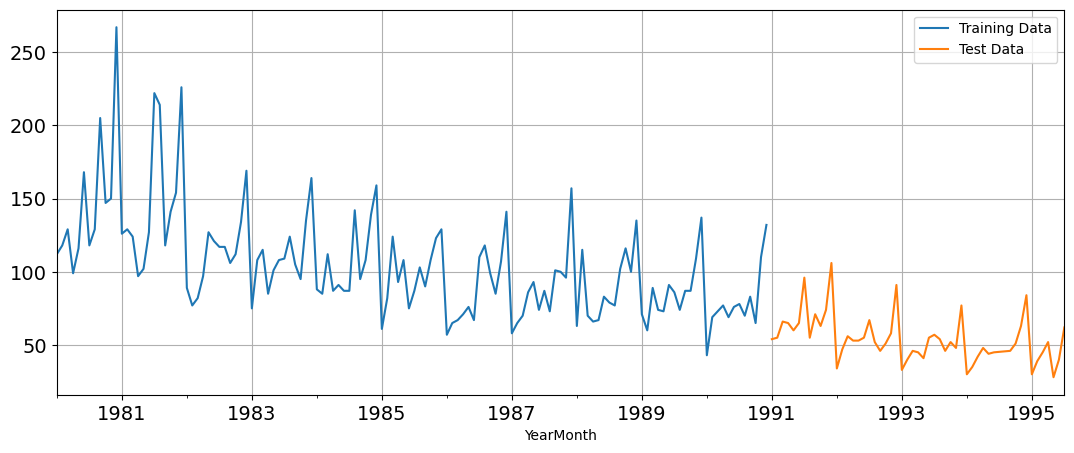

In [48]:
rose_train_df['Rose'].plot(figsize=(13,5), fontsize=14)
rose_test_df['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [49]:
rose_train_time = [i+1 for i in range(len(rose_train_df))]
rose_test_time = [i+43 for i in range(len(rose_test_df))]
print('Training Time instance','\n',rose_train_time)
print('Test Time instance','\n',rose_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


### Linear Regression

In [50]:
LinearRegression_train_rose = rose_train_df.copy()
LinearRegression_test_rose = rose_test_df.copy()



LinearRegression_train_rose['time'] = rose_train_time
LinearRegression_test_rose['time'] = rose_test_time

print('First few rows of Training Data','\n',LinearRegression_train_rose.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_rose.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_rose.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_rose.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 



In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
spark_lr = LinearRegression()

In [53]:
spark_lr.fit(LinearRegression_train_spark[['time']],LinearRegression_train_spark['Sparkling'].values)

LinearRegression()

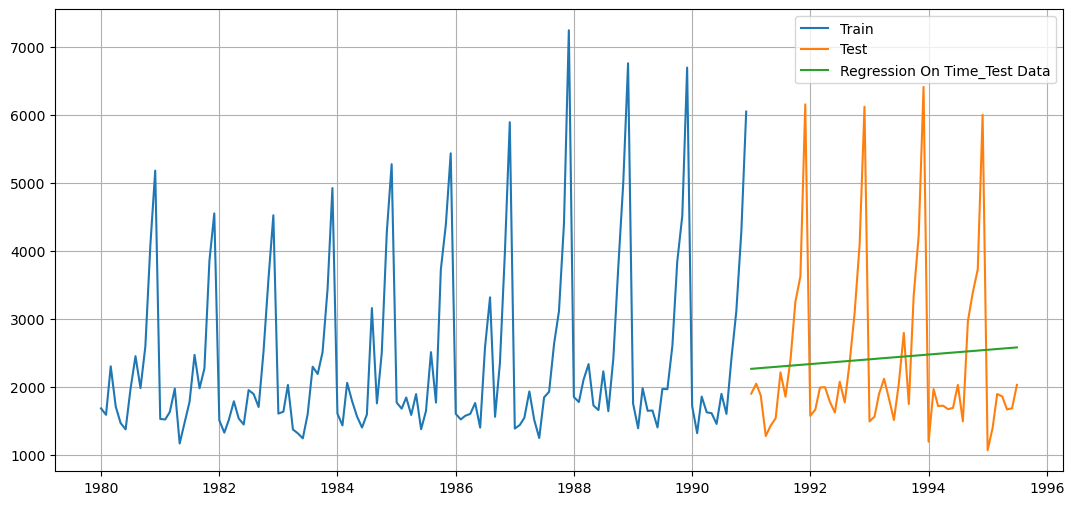

In [54]:
spark_test_predictions_model1 = spark_lr.predict(LinearRegression_test_spark[['time']])
LinearRegression_test_spark['RegOnTime'] = spark_test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot(spark_train_df['Sparkling'], label='Train')
plt.plot(spark_test_df['Sparkling'], label='Test')
plt.plot(LinearRegression_test_spark['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [55]:
from sklearn import metrics

In [56]:
rmse_model1_test_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],spark_test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test_spark))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.87


In [57]:
resultsDf = pd.DataFrame({'Test RMSE Spark': [rmse_model1_test_spark]},index=['RegressionOnTime'])
resultsDf

Test RMSE Spark
RegressionOnTime      1275.867052

In [58]:
rose_lr = LinearRegression()

In [59]:
rose_lr.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)

LinearRegression()

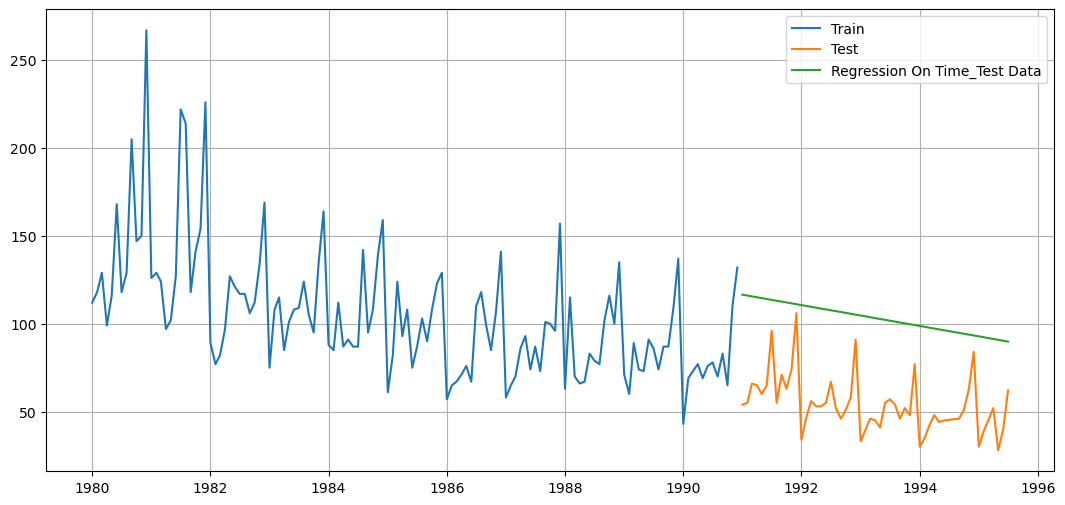

In [60]:
rose_test_predictions_model1 = rose_lr.predict(LinearRegression_test_rose[['time']])
LinearRegression_test_rose['RegOnTime'] = rose_test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot(rose_train_df['Rose'], label='Train')
plt.plot(rose_test_df['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [61]:
rmse_model1_test_rose = metrics.mean_squared_error(rose_test_df['Rose'],rose_test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test_rose))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.43


In [62]:
resultsDf_12 = pd.DataFrame({'Test RMSE Rose': [rmse_model1_test_rose]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
#resultsDf.to_csv('results_lr.csv')
resultsDf

Test RMSE Spark  Test RMSE Rose
RegressionOnTime      1275.867052       51.433312

### Naive Bayes for Sparkling

In [63]:
Spark_naive_train = spark_train_df.copy()
Spark_naive_test = spark_test_df.copy()

In [64]:
Spark_naive_test['naive'] = np.asarray(Spark_naive_train['Sparkling'])[len(np.asarray(Spark_naive_train['Sparkling']))-1]
Spark_naive_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

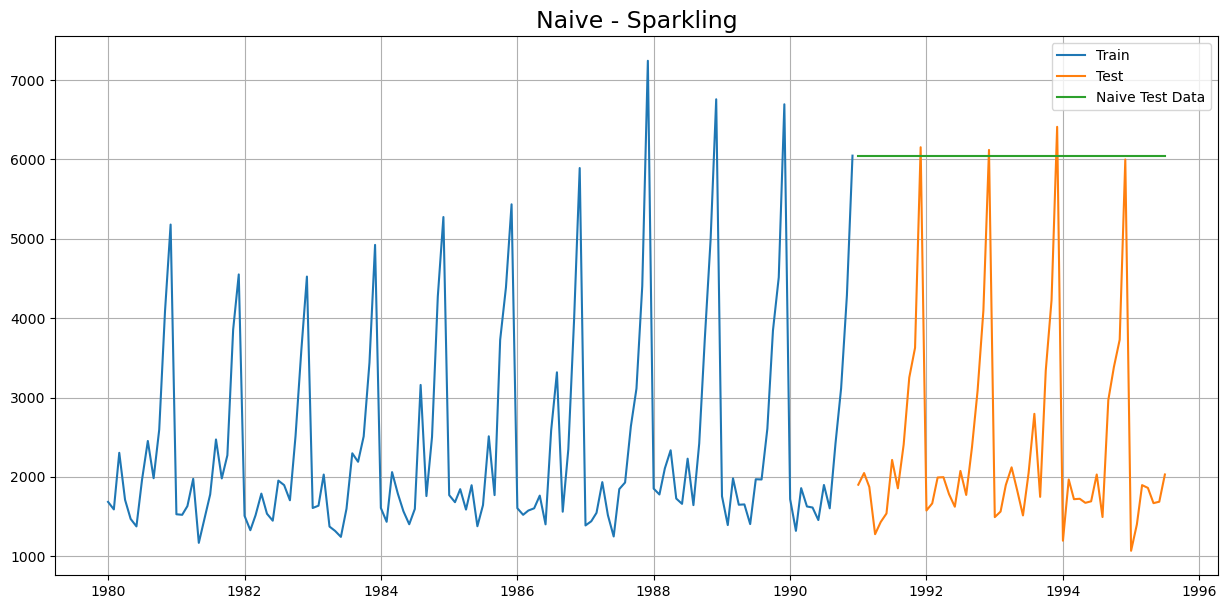

In [65]:
plt.plot(Spark_naive_train['Sparkling'], label='Train')
plt.plot(Spark_naive_test['Sparkling'], label='Test')

plt.plot(Spark_naive_test['naive'], label='Naive Test Data')

plt.legend(loc='best')
plt.title("Naive - Sparkling", fontsize=17)
plt.grid();

In [66]:
rmse_model2_test_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],Spark_naive_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_spark))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


### Naive Bayes for Rose

In [67]:
Rose_naive_train = rose_train_df.copy()
Rose_naive_test = rose_test_df.copy()

In [68]:
Rose_naive_test['naive'] = np.asarray(Rose_naive_train['Rose'])[len(np.asarray(Rose_naive_train['Rose']))-1]
Rose_naive_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

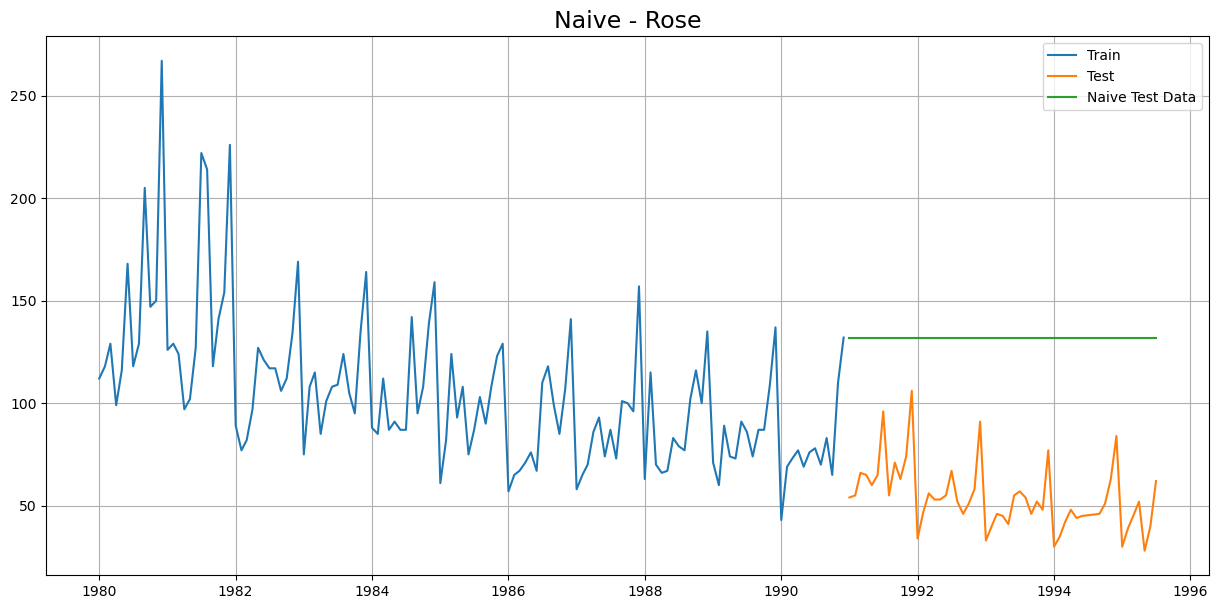

In [69]:
plt.plot(Rose_naive_train['Rose'], label='Train')
plt.plot(Rose_naive_test['Rose'], label='Test')

plt.plot(Rose_naive_test['naive'], label='Naive Test Data')

plt.legend(loc='best')
plt.title("Naive - Rose", fontsize=17)
plt.grid();

In [70]:
rmse_model2_test_rose = metrics.mean_squared_error(rose_test_df['Rose'],Rose_naive_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_rose))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [71]:
resultsDf

Test RMSE Spark  Test RMSE Rose
RegressionOnTime      1275.867052       51.433312

### Simple Moving Average

In [72]:
SimpleAverage_train_spark = spark_train_df.copy()
SimpleAverage_test_spark = spark_test_df.copy()

In [73]:
SimpleAverage_test_spark['mean_forecast'] = spark_train_df['Sparkling'].mean()
SimpleAverage_test_spark.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

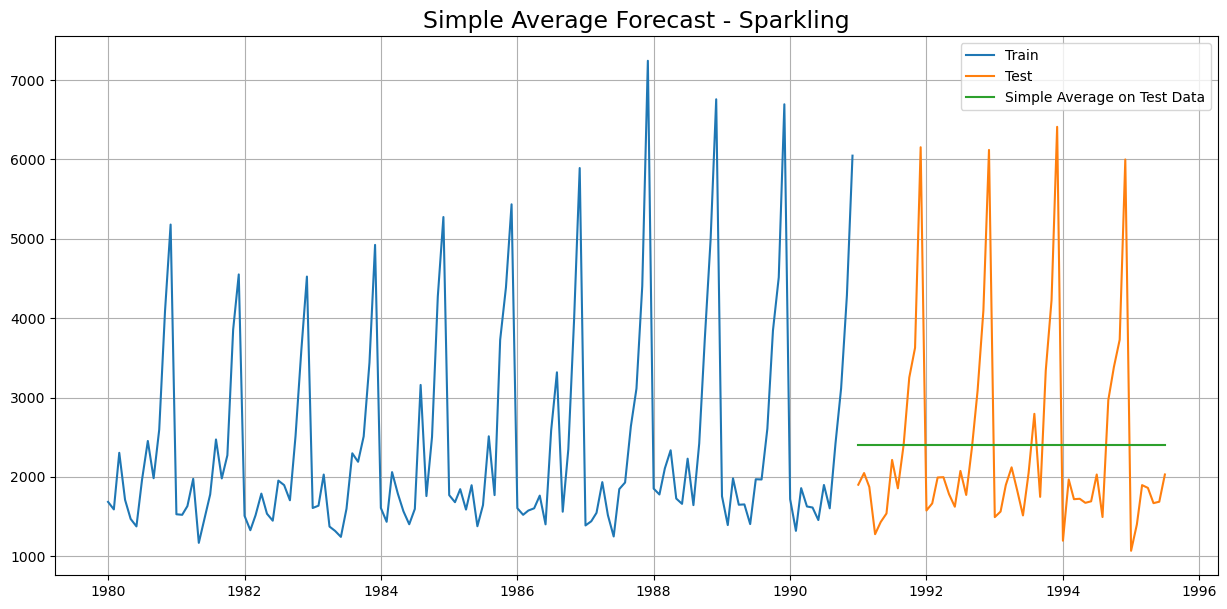

In [74]:
plt.plot(SimpleAverage_train_spark['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_spark['Sparkling'], label='Test')

plt.plot(SimpleAverage_test_spark['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

In [75]:
rmse_model3_test_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],SimpleAverage_test_spark['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model3_test_spark))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [76]:
resultsDf_3_spark = pd.DataFrame({'Test RMSE Spark': [rmse_model3_test_spark]}
                           ,index=['SimpleAverageModel'])
resultsDf_3_spark

Test RMSE Spark
SimpleAverageModel      1275.081804

### Simple Average for Rose

In [77]:
SimpleAverage_train_rose = rose_train_df.copy()
SimpleAverage_test_rose = rose_test_df.copy()

In [78]:
SimpleAverage_test_rose['mean_forecast'] = rose_train_df['Rose'].mean()
SimpleAverage_test_rose.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

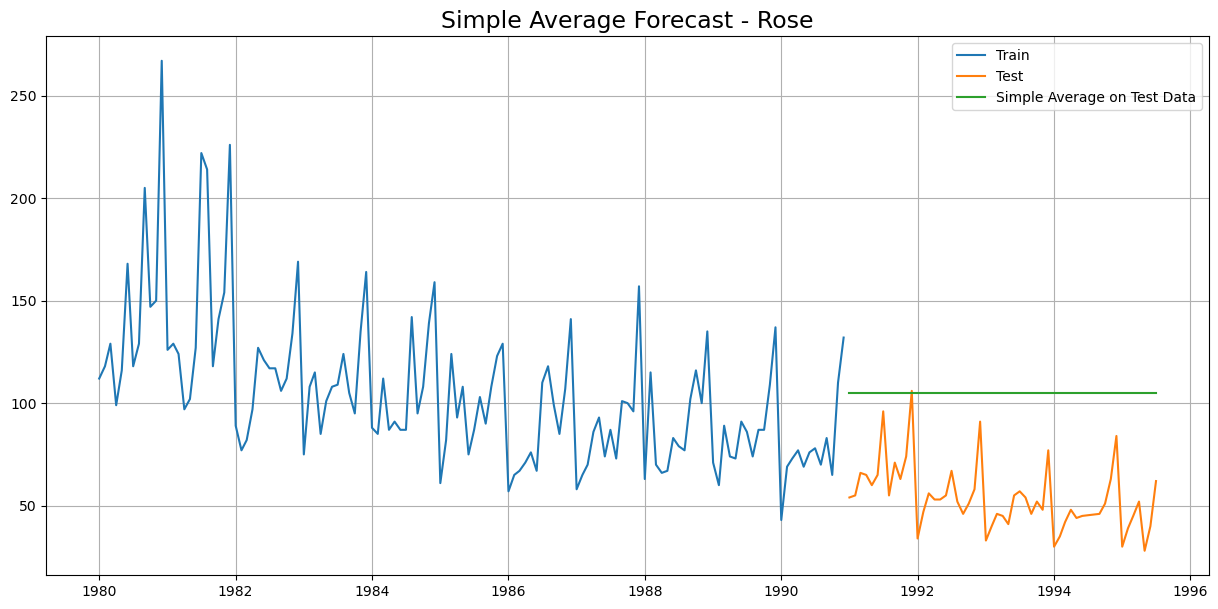

In [79]:
plt.plot(SimpleAverage_train_rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_rose['Rose'], label='Test')

plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('Rose_simpleaverage.jpg', bbox_inches='tight');

In [80]:
rmse_model3_test_rose = metrics.mean_squared_error(rose_test_df['Rose'],SimpleAverage_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model3_test_rose))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [81]:
resultsDf_3_rose = pd.DataFrame({'Test RMSE Rose': [rmse_model3_test_rose]}
                           ,index=['SimpleAverageModel'])
resultsDf_3_rose

Test RMSE Rose
SimpleAverageModel        53.46057

In [82]:
resultsDf4 = resultsDf_3_spark.join(resultsDf_3_rose, how='outer')
resultsDf4

Test RMSE Spark  Test RMSE Rose
SimpleAverageModel      1275.081804        53.46057

In [83]:
resultsDf = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf

Test RMSE Spark  Test RMSE Rose
RegressionOnTime        1275.867052       51.433312
SimpleAverageModel      1275.081804       53.460570

### Moving Average for Sparkling

In [84]:
MovingAverage_spark = spark_df.copy()
MovingAverage_spark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [85]:
MovingAverage_spark['Trailing_2_spark'] = MovingAverage_spark['Sparkling'].rolling(2).mean()
MovingAverage_spark['Trailing_4_spark'] = MovingAverage_spark['Sparkling'].rolling(4).mean()
MovingAverage_spark['Trailing_6_spark'] = MovingAverage_spark['Sparkling'].rolling(6).mean()
MovingAverage_spark['Trailing_9_spark'] = MovingAverage_spark['Sparkling'].rolling(9).mean()

MovingAverage_spark.head()

Sparkling  Trailing_2_spark  Trailing_4_spark  Trailing_6_spark  \
YearMonth                                                                     
1980-01-01       1686               NaN               NaN               NaN   
1980-02-01       1591            1638.5               NaN               NaN   
1980-03-01       2304            1947.5               NaN               NaN   
1980-04-01       1712            2008.0           1823.25               NaN   
1980-05-01       1471            1591.5           1769.50               NaN   

            Trailing_9_spark  
YearMonth                     
1980-01-01               NaN  
1980-02-01               NaN  
1980-03-01               NaN  
1980-04-01               NaN  
1980-05-01               NaN

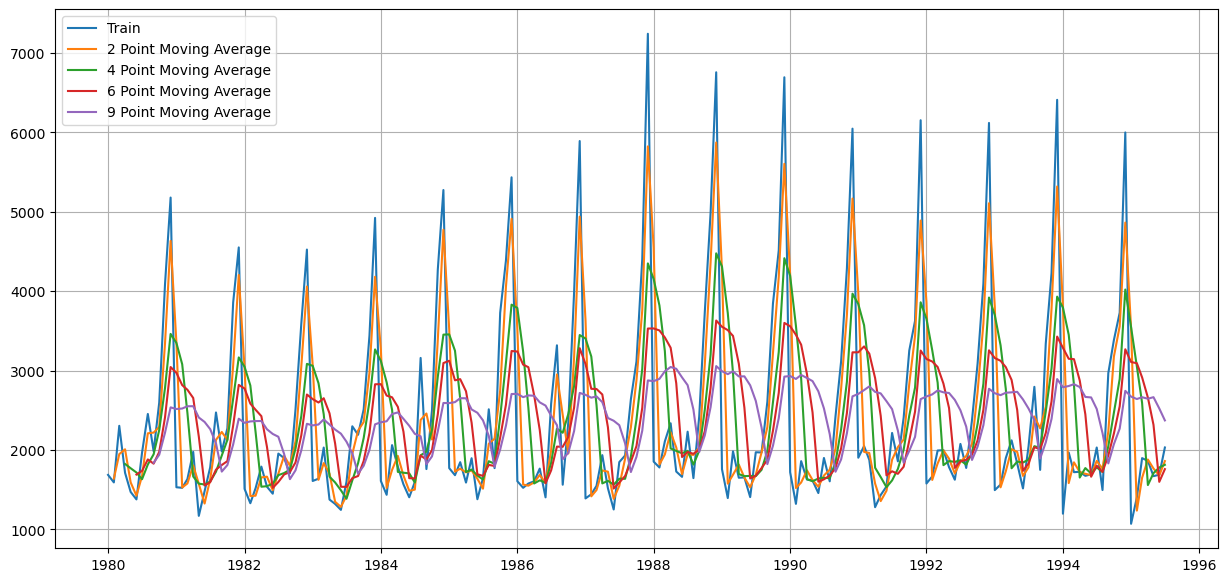

In [86]:
plt.plot(MovingAverage_spark['Sparkling'], label='Train')
plt.plot(MovingAverage_spark['Trailing_2_spark'], label='2 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_4_spark'], label='4 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_6_spark'],label = '6 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_9_spark'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [87]:
trailing_MovingAverage_spark_train=MovingAverage_spark[MovingAverage_spark.index<'1991'] 
trailing_MovingAverage_spark_test=MovingAverage_spark[MovingAverage_spark.index>='1991']

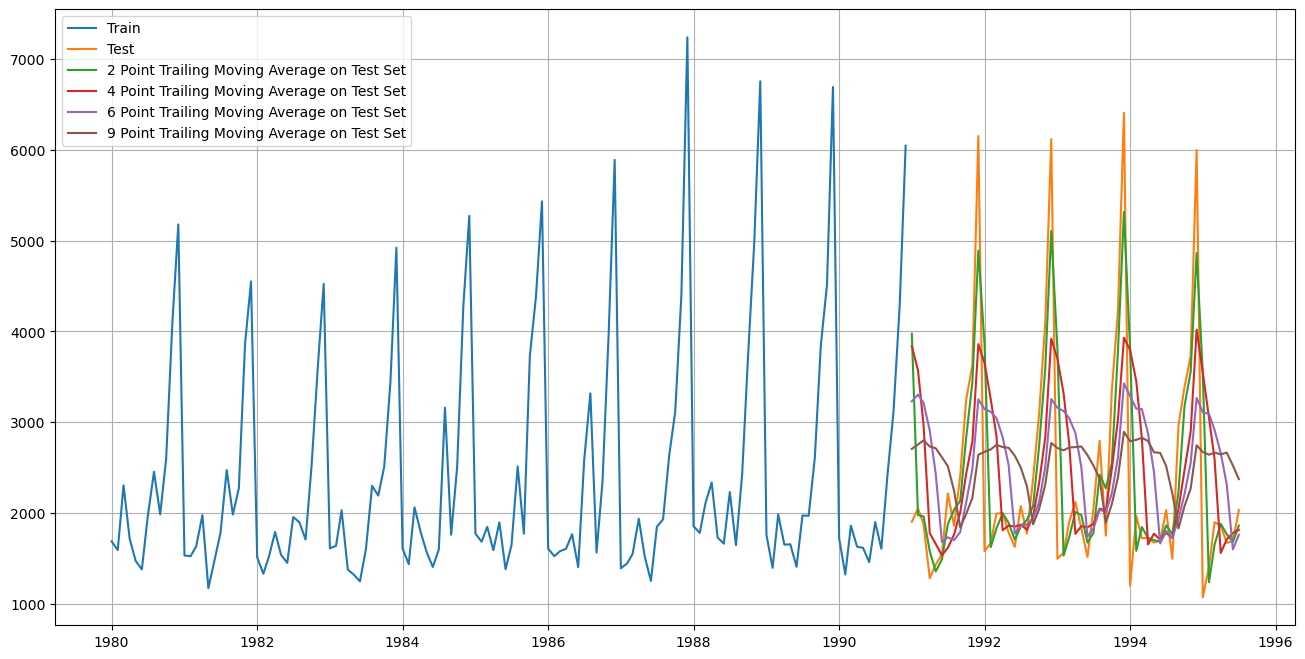

In [88]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_spark_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_spark_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_spark_test['Trailing_2_spark'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_spark_test['Trailing_4_spark'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_spark_test['Trailing_6_spark'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_spark_test['Trailing_9_spark'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [89]:
rmse_model4_test_2_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],trailing_MovingAverage_spark_test['Trailing_2_spark'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2_spark))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],trailing_MovingAverage_spark_test['Trailing_4_spark'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4_spark))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],trailing_MovingAverage_spark_test['Trailing_6_spark'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6_spark))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],trailing_MovingAverage_spark_test['Trailing_9_spark'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9_spark))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [90]:
resultsDf_4_spark = pd.DataFrame({'Test RMSE Spark': [rmse_model4_test_2_spark,rmse_model4_test_4_spark
                                          ,rmse_model4_test_6_spark,rmse_model4_test_9_spark]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf_4_spark

Test RMSE Spark
2pointTrailingMovingAverage       813.400684
4pointTrailingMovingAverage      1156.589694
6pointTrailingMovingAverage      1283.927428
9pointTrailingMovingAverage      1346.278315

### Moving Average for Rose

In [91]:
MovingAverage_rose = rose_df.copy()
MovingAverage_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [92]:
MovingAverage_rose['Trailing_2_rose'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4_rose'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6_rose'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_9_rose'] = MovingAverage_rose['Rose'].rolling(9).mean()

MovingAverage_rose.head()

Rose  Trailing_2_rose  Trailing_4_rose  Trailing_6_rose  \
YearMonth                                                              
1980-01-01  112.0              NaN              NaN              NaN   
1980-02-01  118.0            115.0              NaN              NaN   
1980-03-01  129.0            123.5              NaN              NaN   
1980-04-01   99.0            114.0            114.5              NaN   
1980-05-01  116.0            107.5            115.5              NaN   

            Trailing_9_rose  
YearMonth                    
1980-01-01              NaN  
1980-02-01              NaN  
1980-03-01              NaN  
1980-04-01              NaN  
1980-05-01              NaN

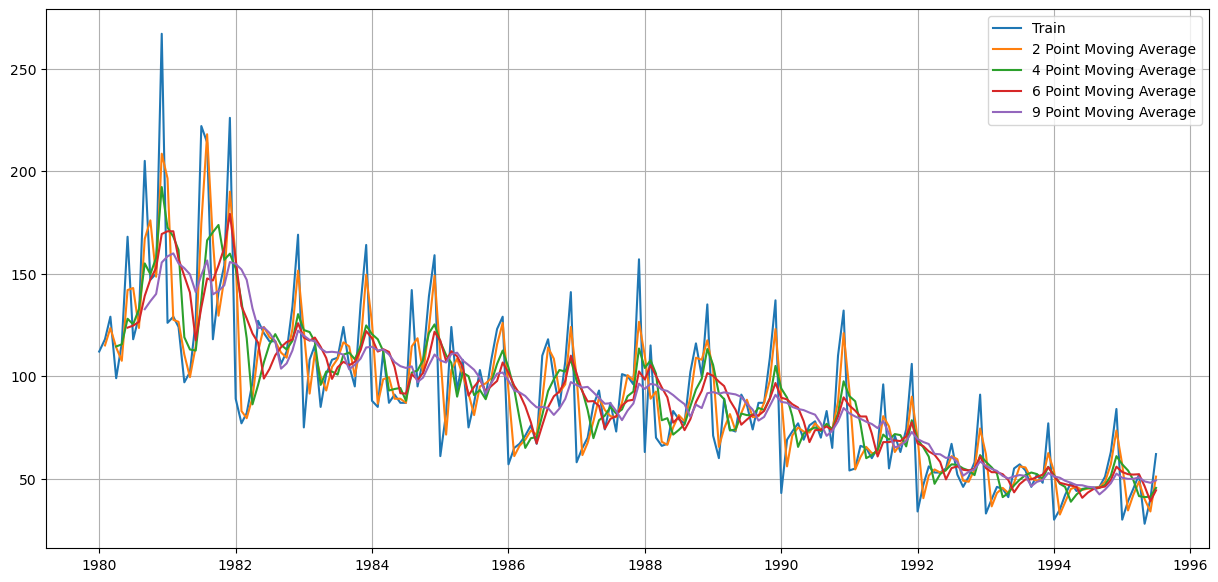

In [93]:
plt.plot(MovingAverage_rose['Rose'], label='Train')
plt.plot(MovingAverage_rose['Trailing_2_rose'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4_rose'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6_rose'],label = '6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_9_rose'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [94]:
trailing_MovingAverage_rose_train=MovingAverage_rose[MovingAverage_rose.index<'1991'] 
trailing_MovingAverage_rose_test=MovingAverage_rose[MovingAverage_rose.index>='1991']

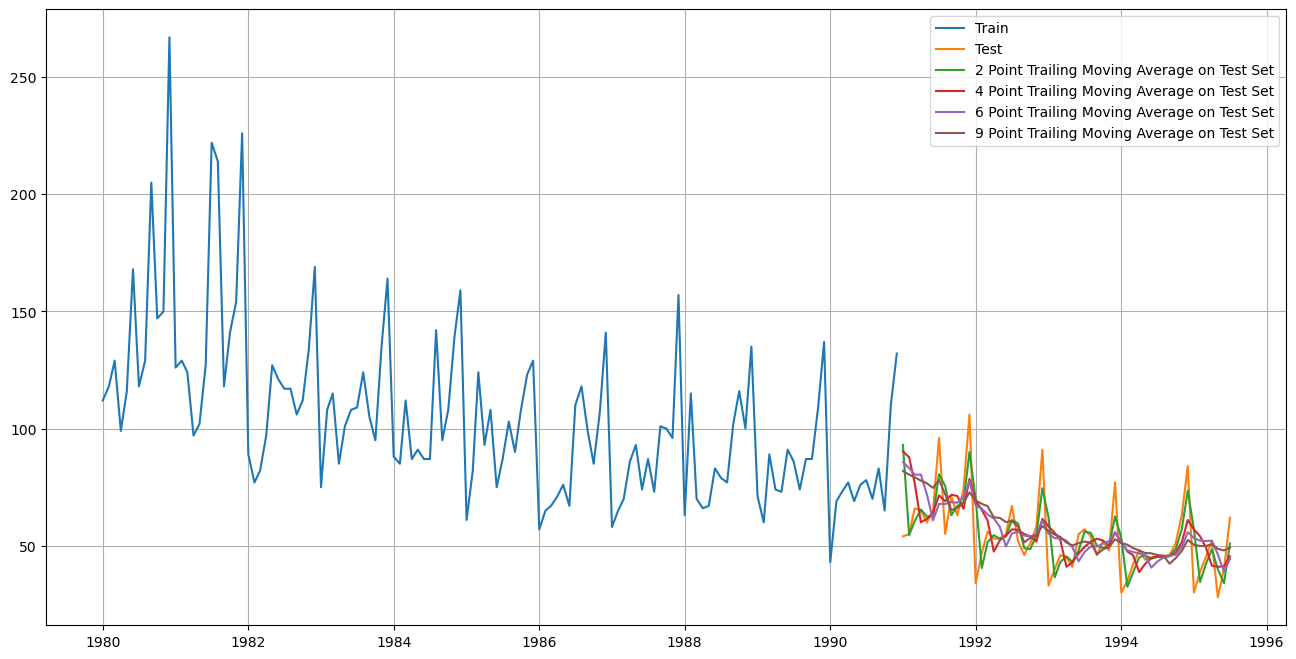

In [95]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_rose_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_rose_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_rose_test['Trailing_2_rose'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rose_test['Trailing_4_rose'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rose_test['Trailing_6_rose'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_rose_test['Trailing_9_rose'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [96]:
rmse_model4_test_2_rose = metrics.mean_squared_error(rose_test_df['Rose'],trailing_MovingAverage_rose_test['Trailing_2_rose'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2_rose))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4_rose = metrics.mean_squared_error(rose_test_df['Rose'],trailing_MovingAverage_rose_test['Trailing_4_rose'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4_rose))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6_rose = metrics.mean_squared_error(rose_test_df['Rose'],trailing_MovingAverage_rose_test['Trailing_6_rose'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6_rose))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9_rose = metrics.mean_squared_error(rose_test_df['Rose'],trailing_MovingAverage_rose_test['Trailing_9_rose'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9_rose))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [97]:
resultsDf_4_rose = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2_rose,rmse_model4_test_4_rose
                                          ,rmse_model4_test_6_rose,rmse_model4_test_9_rose]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf_4_rose

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

In [98]:
resultsDf5 = resultsDf_4_spark.join(resultsDf_4_rose, how='outer')
resultsDf5

Test RMSE Spark  Test RMSE Rose
2pointTrailingMovingAverage       813.400684       11.529278
4pointTrailingMovingAverage      1156.589694       14.451403
6pointTrailingMovingAverage      1283.927428       14.566327
9pointTrailingMovingAverage      1346.278315       14.727630

In [99]:
resultsDf = pd.concat([resultsDf, resultsDf5], axis=0)
resultsDf

Test RMSE Spark  Test RMSE Rose
RegressionOnTime                 1275.867052       51.433312
SimpleAverageModel               1275.081804       53.460570
2pointTrailingMovingAverage       813.400684       11.529278
4pointTrailingMovingAverage      1156.589694       14.451403
6pointTrailingMovingAverage      1283.927428       14.566327
9pointTrailingMovingAverage      1346.278315       14.727630

### Comparison of all models for Sparkling

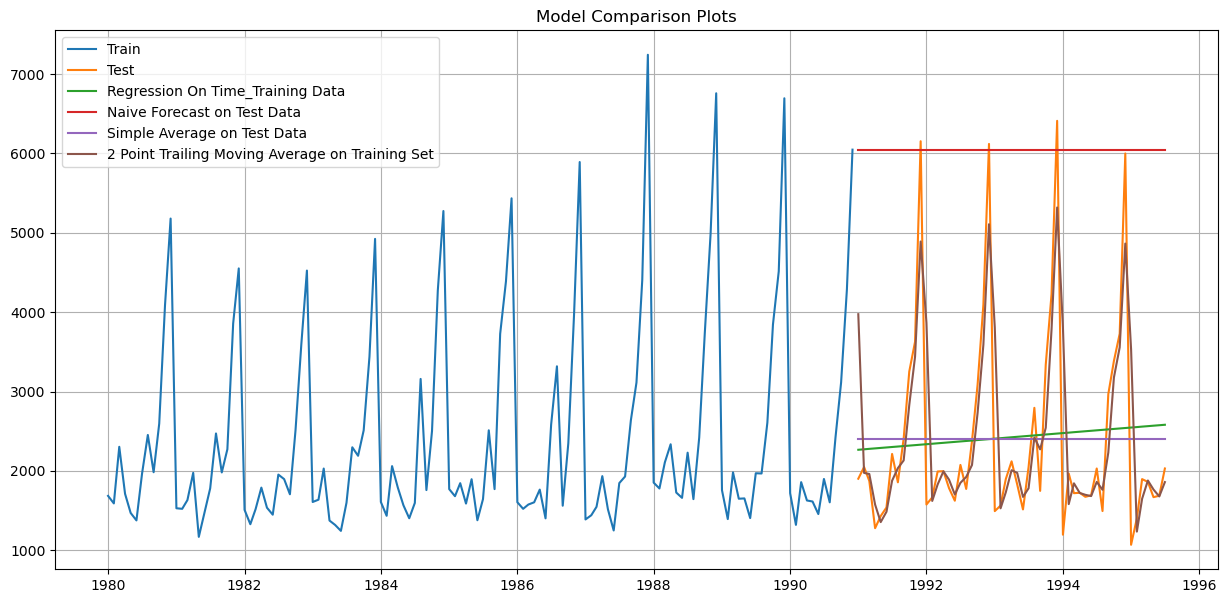

In [100]:
plt.plot(spark_train_df['Sparkling'], label='Train')
plt.plot(spark_test_df['Sparkling'], label='Test')

plt.plot(LinearRegression_test_spark['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(Spark_naive_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_spark['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_spark_test['Trailing_2_spark'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Comparison of all models for Rose

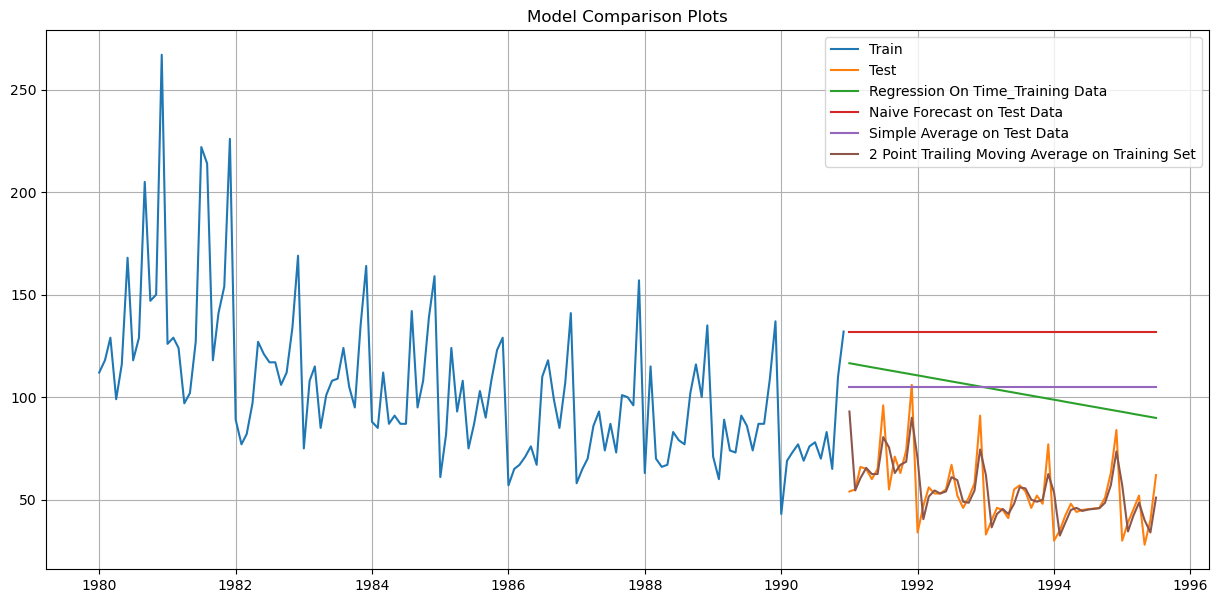

In [101]:
plt.plot(rose_train_df['Rose'], label='Train')
plt.plot(rose_test_df['Rose'], label='Test')

plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(Rose_naive_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_rose_test['Trailing_2_rose'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Simple Exponential Smoothing for Sparkling

In [102]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [103]:
SES_train_spark = spark_train_df.copy()
SES_test_spark = spark_test_df.copy()

In [104]:
model_SES_spark = SimpleExpSmoothing(SES_train_spark['Sparkling'])

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [105]:
model_SES_autofit_spark = model_SES_spark.fit(optimized=True)

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [106]:
model_SES_autofit_spark.params

{'smoothing_level': 0.049608122255925764,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5667480262205,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
SES_test_spark['predict'] = model_SES_autofit_spark.forecast(steps=len(SES_test_spark))
SES_test_spark.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.935908
1991-02-01       2049  2724.935908
1991-03-01       1874  2724.935908
1991-04-01       1279  2724.935908
1991-05-01       1432  2724.935908

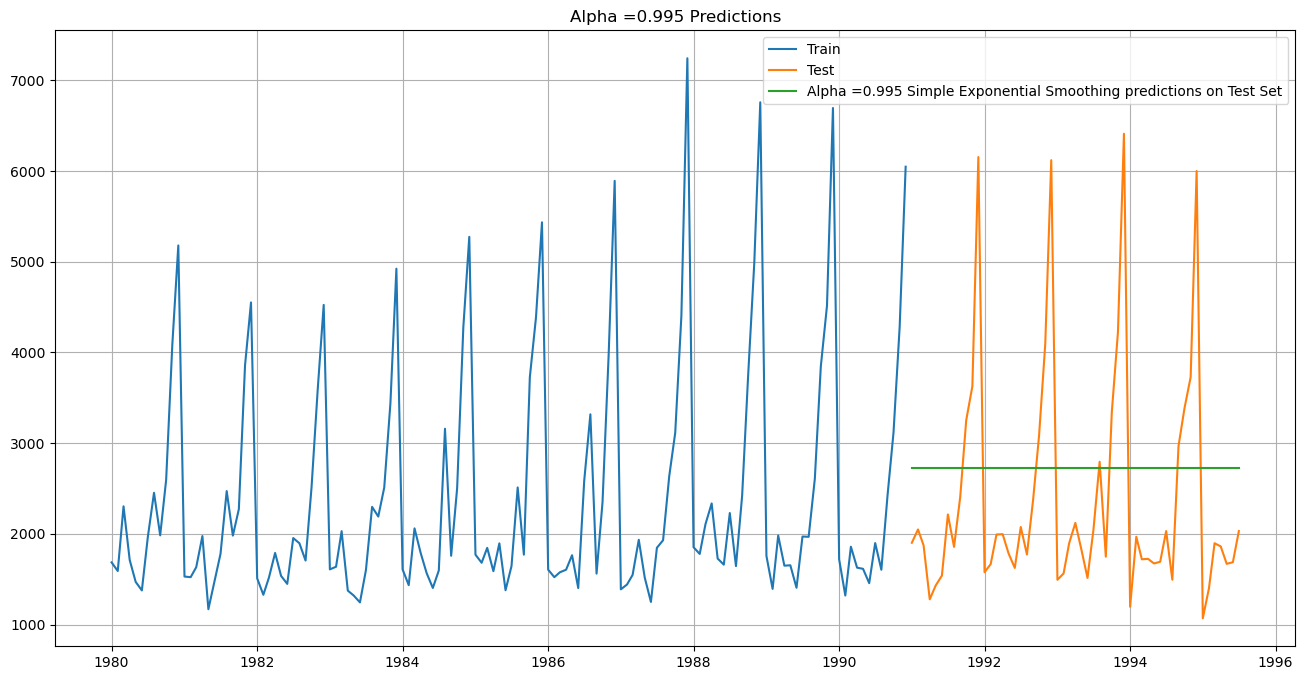

In [108]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_spark['Sparkling'], label='Train')
plt.plot(SES_test_spark['Sparkling'], label='Test')

plt.plot(SES_test_spark['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [109]:
rmse_model5_test_spark = metrics.mean_squared_error(SES_test_spark['Sparkling'],SES_test_spark['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_spark))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.036


In [110]:
resultsDf_5_spark = pd.DataFrame({'Test RMSE Spark': [rmse_model5_test_spark]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf_5_spark

Test RMSE Spark
Alpha=0.995,SimpleExponentialSmoothing        1316.0363

### Simple Exponential Smoothing for Rose

In [111]:
SES_train_rose = rose_train_df.copy()
SES_test_rose = rose_test_df.copy()

In [112]:
model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [113]:
model_SES_autofit_rose = model_SES_rose.fit(optimized=True)

In [114]:
model_SES_autofit_rose.params

{'smoothing_level': 0.09874922465318293,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3874326670603,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [115]:
SES_test_rose['predict'] = model_SES_autofit_rose.forecast(steps=len(SES_test_rose))
SES_test_rose.head()

Rose   predict
YearMonth                 
1991-01-01  54.0  87.10498
1991-02-01  55.0  87.10498
1991-03-01  66.0  87.10498
1991-04-01  65.0  87.10498
1991-05-01  60.0  87.10498

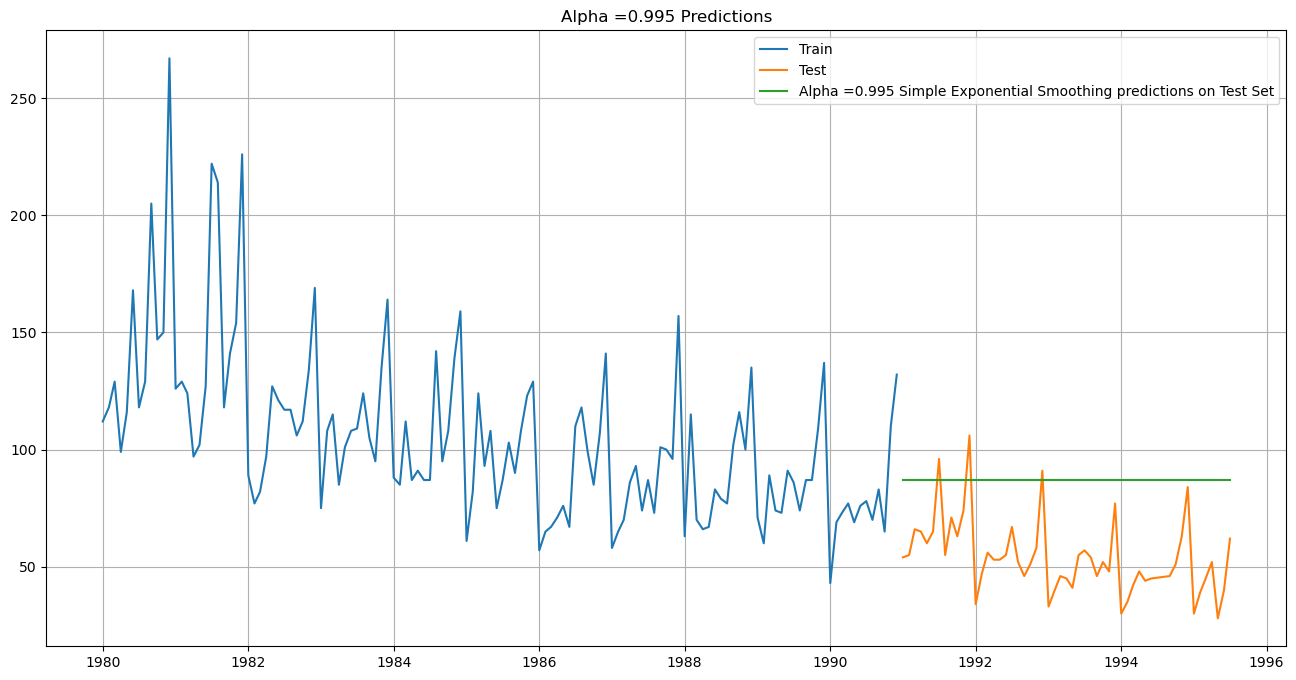

In [116]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_test_rose['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [117]:
rmse_model5_test_rose = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_rose))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [118]:
resultsDf_5_rose = pd.DataFrame({'Test RMSE Rose': [rmse_model5_test_rose]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf_5_rose

Test RMSE Rose
Alpha=0.995,SimpleExponentialSmoothing       36.796225

In [119]:
resultsDf6 = resultsDf_5_spark.join(resultsDf_5_rose, how='outer')
resultsDf6

Test RMSE Spark  Test RMSE Rose
Alpha=0.995,SimpleExponentialSmoothing        1316.0363       36.796225

In [120]:
resultsDf = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf

Test RMSE Spark  Test RMSE Rose
RegressionOnTime                            1275.867052       51.433312
SimpleAverageModel                          1275.081804       53.460570
2pointTrailingMovingAverage                  813.400684       11.529278
4pointTrailingMovingAverage                 1156.589694       14.451403
6pointTrailingMovingAverage                 1283.927428       14.566327
9pointTrailingMovingAverage                 1346.278315       14.727630
Alpha=0.995,SimpleExponentialSmoothing      1316.036300       36.796225

### Setting different alpha values for Sparkling.

In [121]:
resultsDf_6_spark = pd.DataFrame({'Alpha Values':[],'Train RMSE Spark':[],'Test RMSE Spark': []})
resultsDf_6_spark

Empty DataFrame
Columns: [Alpha Values, Train RMSE Spark, Test RMSE Spark]
Index: []

In [122]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i_spark = model_SES_spark.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_spark['predict',i] = model_SES_alpha_i_spark.fittedvalues
    SES_test_spark['predict',i] = model_SES_alpha_i_spark.forecast(steps=55)
    
    rmse_model6_train_i_spark = metrics.mean_squared_error(spark_train_df['Sparkling'],SES_train_spark['predict',i],squared=False)
    
    rmse_model6_test_i_spark = metrics.mean_squared_error(spark_test_df['Sparkling'],SES_test_spark['predict',i],squared=False)
    
    resultsDf_6_spark = resultsDf_6_spark.append({'Alpha Values':i,'Train RMSE Spark':rmse_model6_train_i_spark
                                      ,'Test RMSE Spark':rmse_model6_test_i_spark}, ignore_index=True)

In [123]:
SES_test_spark

Sparkling      predict  (predict, 0.1)  (predict, 0.2)  \
YearMonth                                                            
1991-01-01       1902  2724.935908     2914.795408     3357.723951   
1991-02-01       2049  2724.935908     2914.795408     3357.723951   
1991-03-01       1874  2724.935908     2914.795408     3357.723951   
1991-04-01       1279  2724.935908     2914.795408     3357.723951   
1991-05-01       1432  2724.935908     2914.795408     3357.723951   
1991-06-01       1540  2724.935908     2914.795408     3357.723951   
1991-07-01       2214  2724.935908     2914.795408     3357.723951   
1991-08-01       1857  2724.935908     2914.795408     3357.723951   
1991-09-01       2408  2724.935908     2914.795408     3357.723951   
1991-10-01       3252  2724.935908     2914.795408     3357.723951   
1991-11-01       3627  2724.935908     2914.795408     3357.723951   
1991-12-01       6153  2724.935908     2914.795408     3357.723951   
1992-01-01       1577  2724.935908     2914.795408     3357.723951   
1992-02-01       1667  2724.935908     2914.795408     3357.723951   
1992-03-01       1993  2724.935908     2914.795408     3357.723951   
1992-04-01       1997  2724.935908     2914.795408     3357.723951   
1992-05-01       1783  2724.935908     2914.795408     3357.723951   
1992-06-01       1625  2724.935908     2914.795408     3357.723951   
1992-07-01       2076  2724.935908     2914.795408     3357.723951   
1992-08-01       1773  2724.935908     2914.795408     3357.723951   
1992-09-01       2377  2724.935908     2914.795408     3357.723951   
1992-10-01       3088  2724.935908     2914.795408     3357.723951   
1992-11-01       4096  2724.935908     2914.795408     3357.723951   
1992-12-01       6119  2724.935908     2914.795408     3357.723951   
1993-01-01       1494  2724.935908     2914.795408     3357.723951   
1993-02-01       1564  2724.935908     2914.795408     3357.723951   
1993-03-01       1898  2724.935908     2914.795408     3357.723951   
1993-04-01       2121  2724.935908     2914.795408     3357.723951   
1993-05-01       1831  2724.935908     2914.795408     3357.723951   
1993-06-01       1515  2724.935908     2914.795408     3357.723951   
1993-07-01       2048  2724.935908     2914.795408     3357.723951   
1993-08-01       2795  2724.935908     2914.795408     3357.723951   
1993-09-01       1749  2724.935908     2914.795408     3357.723951   
1993-10-01       3339  2724.935908     2914.795408     3357.723951   
1993-11-01       4227  2724.935908     2914.795408     3357.723951   
1993-12-01       6410  2724.935908     2914.795408     3357.723951   
1994-01-01       1197  2724.935908     2914.795408     3357.723951   
1994-02-01       1968  2724.935908     2914.795408     3357.723951   
1994-03-01       1720  2724.935908     2914.795408     3357.723951   
1994-04-01       1725  2724.935908     2914.795408     3357.723951   
1994-05-01       1674  2724.935908     2914.795408     3357.723951   
1994-06-01       1693  2724.935908     2914.795408     3357.723951   
1994-07-01       2031  2724.935908     2914.795408     3357.723951   
1994-08-01       1495  2724.935908     2914.795408     3357.723951   
1994-09-01       2968  2724.935908     2914.795408     3357.723951   
1994-10-01       3385  2724.935908     2914.795408     3357.723951   
1994-11-01       3729  2724.935908     2914.795408     3357.723951   
1994-12-01       5999  2724.935908     2914.795408     3357.723951   
1995-01-01       1070  2724.935908     2914.795408     3357.723951   
1995-02-01       1402  2724.935908     2914.795408     3357.723951   
1995-03-01       1897  2724.935908     2914.795408     3357.723951   
1995-04-01       1862  2724.935908     2914.795408     3357.723951   
1995-05-01       1670  2724.935908     2914.795408     3357.723951   
1995-06-01       1688  2724.935908     2914.795408     3357.723951   
1995-07-01       2031  2724.935908     2914.795408     3357.723951   

            (predict,

In [124]:
resultsDf_6_spark.sort_values(by=['Test RMSE Spark'],ascending=True)

Alpha Values  Train RMSE Spark  Test RMSE Spark
0           0.1       1333.873836      1375.393398
1           0.2       1356.042987      1595.206839
2           0.3       1359.511747      1935.507132
3           0.4       1352.588879      2311.919615
4           0.5       1344.004369      2666.351413
5           0.6       1338.805381      2979.204388
6           0.7       1338.844308      3249.944092
7           0.8       1344.462091      3483.801006
8           0.9       1355.723518      3686.794285

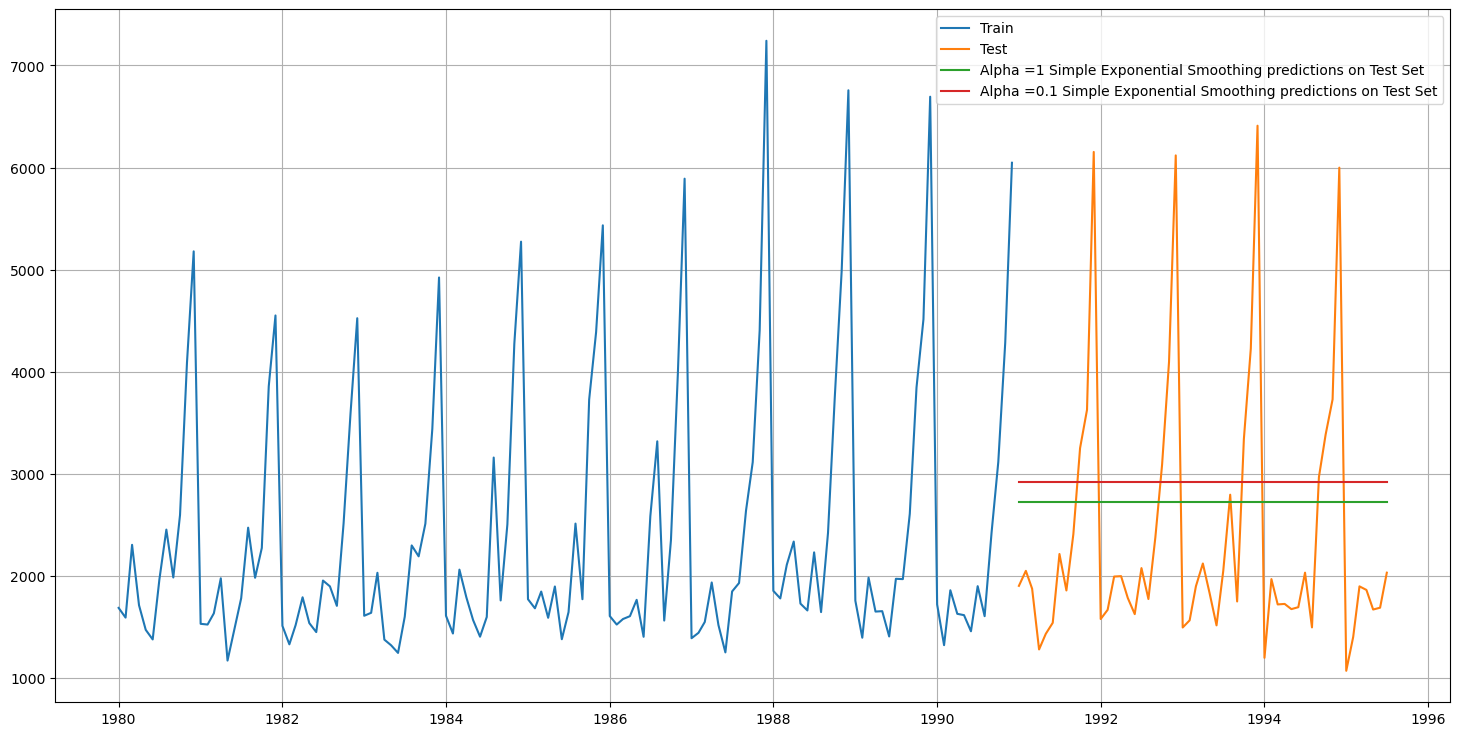

In [125]:
plt.figure(figsize=(18,9))
plt.plot(SES_train_spark['Sparkling'], label='Train')
plt.plot(SES_test_spark['Sparkling'], label='Test')

plt.plot(SES_test_spark['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test_spark['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [126]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE Spark': [resultsDf_6_spark.sort_values(by=['Test RMSE Spark'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])
resultsDf_6_1

Test RMSE Spark
Alpha=0.1,SimpleExponentialSmoothing      1375.393398

### Setting different alpha values for Rose.

In [127]:
resultsDf_6_rose = pd.DataFrame({'Alpha Values':[],'Train RMSE Rose':[],'Test RMSE Rose': []})
resultsDf_6_rose

Empty DataFrame
Columns: [Alpha Values, Train RMSE Rose, Test RMSE Rose]
Index: []

In [128]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i_rose = model_SES_rose.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_rose['predict',i] = model_SES_alpha_i_rose.fittedvalues
    SES_test_rose['predict',i] = model_SES_alpha_i_rose.forecast(steps=55)
    
    rmse_model6_train_i_rose = metrics.mean_squared_error(rose_train_df['Rose'],SES_train_rose['predict',i],squared=False)
    
    rmse_model6_test_i_rose = metrics.mean_squared_error(rose_test_df['Rose'],SES_test_rose['predict',i],squared=False)
    
    resultsDf_6_rose = resultsDf_6_rose.append({'Alpha Values':i,'Train RMSE Rose':rmse_model6_train_i_rose
                                      ,'Test RMSE Rose':rmse_model6_test_i_rose}, ignore_index=True)

In [129]:
SES_test_rose

Rose   predict  (predict, 0.1)  (predict, 0.2)  \
YearMonth                                                          
1991-01-01   54.000000  87.10498       87.140177       92.096329   
1991-02-01   55.000000  87.10498       87.140177       92.096329   
1991-03-01   66.000000  87.10498       87.140177       92.096329   
1991-04-01   65.000000  87.10498       87.140177       92.096329   
1991-05-01   60.000000  87.10498       87.140177       92.096329   
1991-06-01   65.000000  87.10498       87.140177       92.096329   
1991-07-01   96.000000  87.10498       87.140177       92.096329   
1991-08-01   55.000000  87.10498       87.140177       92.096329   
1991-09-01   71.000000  87.10498       87.140177       92.096329   
1991-10-01   63.000000  87.10498       87.140177       92.096329   
1991-11-01   74.000000  87.10498       87.140177       92.096329   
1991-12-01  106.000000  87.10498       87.140177       92.096329   
1992-01-01   34.000000  87.10498       87.140177       92.096329   
1992-02-01   47.000000  87.10498       87.140177       92.096329   
1992-03-01   56.000000  87.10498       87.140177       92.096329   
1992-04-01   53.000000  87.10498       87.140177       92.096329   
1992-05-01   53.000000  87.10498       87.140177       92.096329   
1992-06-01   55.000000  87.10498       87.140177       92.096329   
1992-07-01   67.000000  87.10498       87.140177       92.096329   
1992-08-01   52.000000  87.10498       87.140177       92.096329   
1992-09-01   46.000000  87.10498       87.140177       92.096329   
1992-10-01   51.000000  87.10498       87.140177       92.096329   
1992-11-01   58.000000  87.10498       87.140177       92.096329   
1992-12-01   91.000000  87.10498       87.140177       92.096329   
1993-01-01   33.000000  87.10498       87.140177       92.096329   
1993-02-01   40.000000  87.10498       87.140177       92.096329   
1993-03-01   46.000000  87.10498       87.140177       92.096329   
1993-04-01   45.000000  87.10498       87.140177       92.096329   
1993-05-01   41.000000  87.10498       87.140177       92.096329   
1993-06-01   55.000000  87.10498       87.140177       92.096329   
1993-07-01   57.000000  87.10498       87.140177       92.096329   
1993-08-01   54.000000  87.10498       87.140177       92.096329   
1993-09-01   46.000000  87.10498       87.140177       92.096329   
1993-10-01   52.000000  87.10498       87.140177       92.096329   
1993-11-01   48.000000  87.10498       87.140177       92.096329   
1993-12-01   77.000000  87.10498       87.140177       92.096329   
1994-01-01   30.000000  87.10498       87.140177       92.096329   
1994-02-01   35.000000  87.10498       87.140177       92.096329   
1994-03-01   42.000000  87.10498       87.140177       92.096329   
1994-04-01   48.000000  87.10498       87.140177       92.096329   
1994-05-01   44.000000  87.10498       87.140177       92.096329   
1994-06-01   45.000000  87.10498       87.140177       92.096329   
1994-07-01   45.333333  87.10498       87.140177       92.096329   
1994-08-01   45.666667  87.10498       87.140177       92.096329   
1994-09-01   46.000000  87.10498       87.140177       92.096329   
1994-10-01   51.000000  87.10498       87.140177       92.096329   
1994-11-01   63.000000  87.10498       87.140177       92.096329   
1994-12-01   84.000000  87.10498       87.140177       92.096329   
1995-01-01   30.000000  87.10498       87.140177       92.096329   
1995-02-01   39.000000  87.10498       87.140177       92.096329   
1995-03-01   45.000000  87.10498       87.140177       92.096329   
1995-04-01   52.000000  87.10498       87.140177       92.096329   
1995-05-01   28.000000  87.10498       87.140177       92.096329   
1995-06-01   40.000000  87.10498       87.140177       92.096329   
1995-07-01   62.000000  87.10498       87.140177       92.096329   

            (predict, 0.30000000000000004)  (predict, 0.4)  (predict, 0.5)  \
YearMonth                                                      

In [130]:
resultsDf_6_rose.sort_values(by=['Test RMSE Rose'],ascending=True)

Alpha Values  Train RMSE Rose  Test RMSE Rose
0           0.1        31.815610       36.828033
1           0.2        31.979391       41.361876
2           0.3        32.470164       47.504821
3           0.4        33.035130       53.767406
4           0.5        33.682839       59.641786
5           0.6        34.441171       64.971288
6           0.7        35.323261       69.698162
7           0.8        36.334596       73.773992
8           0.9        37.482782       77.139276

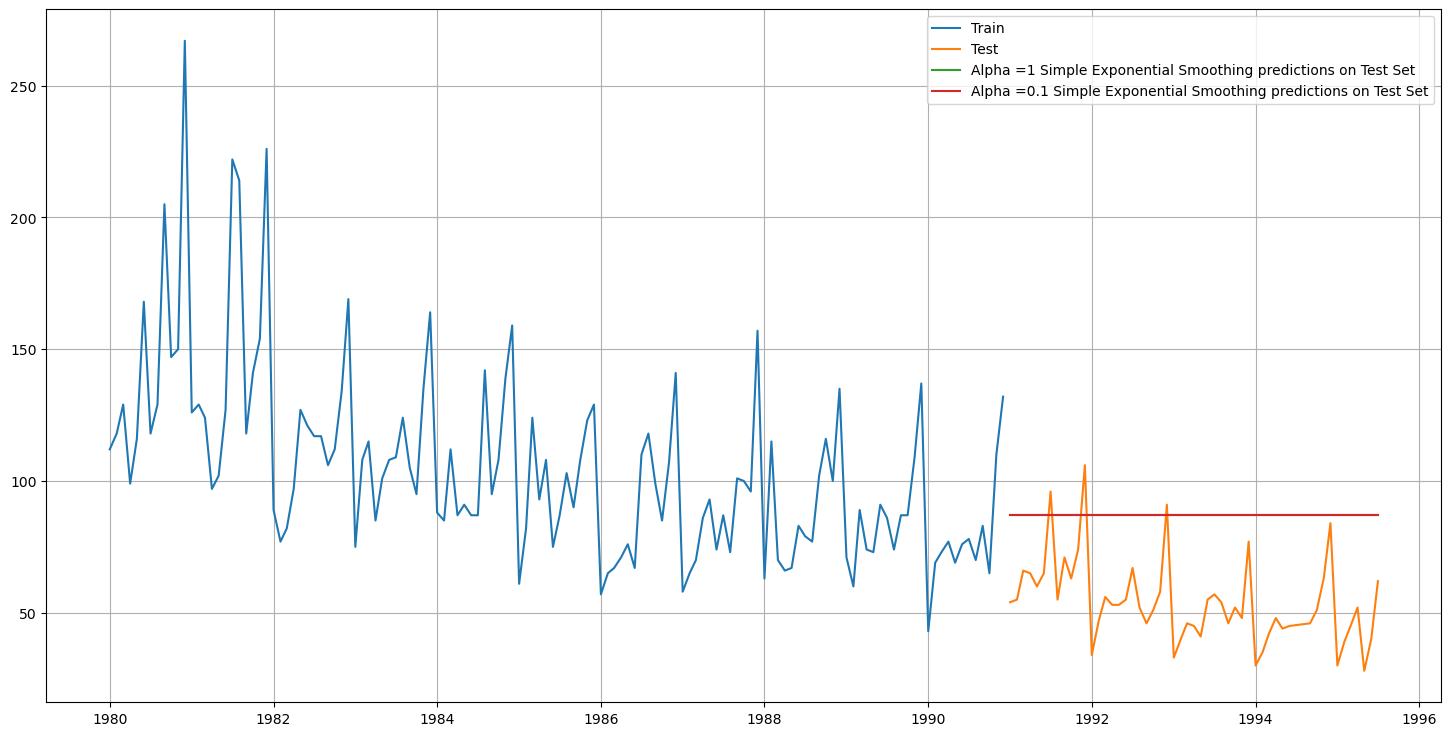

In [131]:
plt.figure(figsize=(18,9))
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_test_rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test_rose['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [132]:
resultsDf_6_2 = pd.DataFrame({'Test RMSE Rose': [resultsDf_6_rose.sort_values(by=['Test RMSE Rose'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])
resultsDf_6_2

Test RMSE Rose
Alpha=0.1,SimpleExponentialSmoothing       36.828033

In [133]:
resultsDf7 = resultsDf_6_1.join(resultsDf_6_2, how='outer')
resultsDf7

Test RMSE Spark  Test RMSE Rose
Alpha=0.1,SimpleExponentialSmoothing      1375.393398       36.828033

In [134]:
resultsDf = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf

Test RMSE Spark  Test RMSE Rose
RegressionOnTime                            1275.867052       51.433312
SimpleAverageModel                          1275.081804       53.460570
2pointTrailingMovingAverage                  813.400684       11.529278
4pointTrailingMovingAverage                 1156.589694       14.451403
6pointTrailingMovingAverage                 1283.927428       14.566327
9pointTrailingMovingAverage                 1346.278315       14.727630
Alpha=0.995,SimpleExponentialSmoothing      1316.036300       36.796225
Alpha=0.1,SimpleExponentialSmoothing        1375.393398       36.828033

### Double Exponential Smoothing (Holt's Model) for Sparkling

In [135]:
DES_train_spark = spark_train_df.copy()
DES_test_spark = spark_test_df.copy()

In [136]:
model_DES_spark = Holt(DES_train_spark['Sparkling'],initialization_method='estimated')

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [137]:
resultsDf_7_spark = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE Spark':[],'Test RMSE Spark': []})
resultsDf_7_spark

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE Spark, Test RMSE Spark]
Index: []

In [138]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_spark_alpha_i_j = model_DES_spark.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_spark['predict',i,j] = model_DES_spark_alpha_i_j.fittedvalues
        DES_test_spark['predict',i,j] = model_DES_spark_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train_spark = metrics.mean_squared_error(DES_train_spark['Sparkling'],DES_train_spark['predict',i,j],squared=False)
        
        rmse_model6_test_spark = metrics.mean_squared_error(DES_test_spark['Sparkling'],DES_test_spark['predict',i,j],squared=False)
        
        resultsDf_7_spark = resultsDf_7_spark.append({'Alpha Values':i,'Beta Values':j,'Train RMSE Spark':rmse_model6_train_spark
                                          ,'Test RMSE Spark':rmse_model6_test_spark}, ignore_index=True)

In [139]:
resultsDf_7_spark

Alpha Values  Beta Values  Train RMSE Spark  Test RMSE Spark
0            0.1          0.1       1373.320853      1777.734773
1            0.1          0.2       1403.485779      2599.314701
2            0.1          0.3       1434.781023      4287.469279
3            0.1          0.4       1469.714230      6044.157399
4            0.1          0.5       1509.672437      7386.659388
..           ...          ...               ...              ...
95           1.0          0.6       1753.408203     49327.087977
96           1.0          0.7       1825.208810     52655.765663
97           1.0          0.8       1902.059815     55442.273880
98           1.0          0.9       1985.450202     57823.177011
99           1.0          1.0       2077.802588     59877.076519

[100 rows x 4 columns]

In [140]:
resultsDf_7_spark.sort_values(by=['Test RMSE Spark']).head()

Alpha Values  Beta Values  Train RMSE Spark  Test RMSE Spark
0            0.1          0.1       1373.320853      1777.734773
1            0.1          0.2       1403.485779      2599.314701
10           0.2          0.1       1413.417928      3611.766690
2            0.1          0.3       1434.781023      4287.469279
20           0.3          0.1       1428.610907      5908.185555

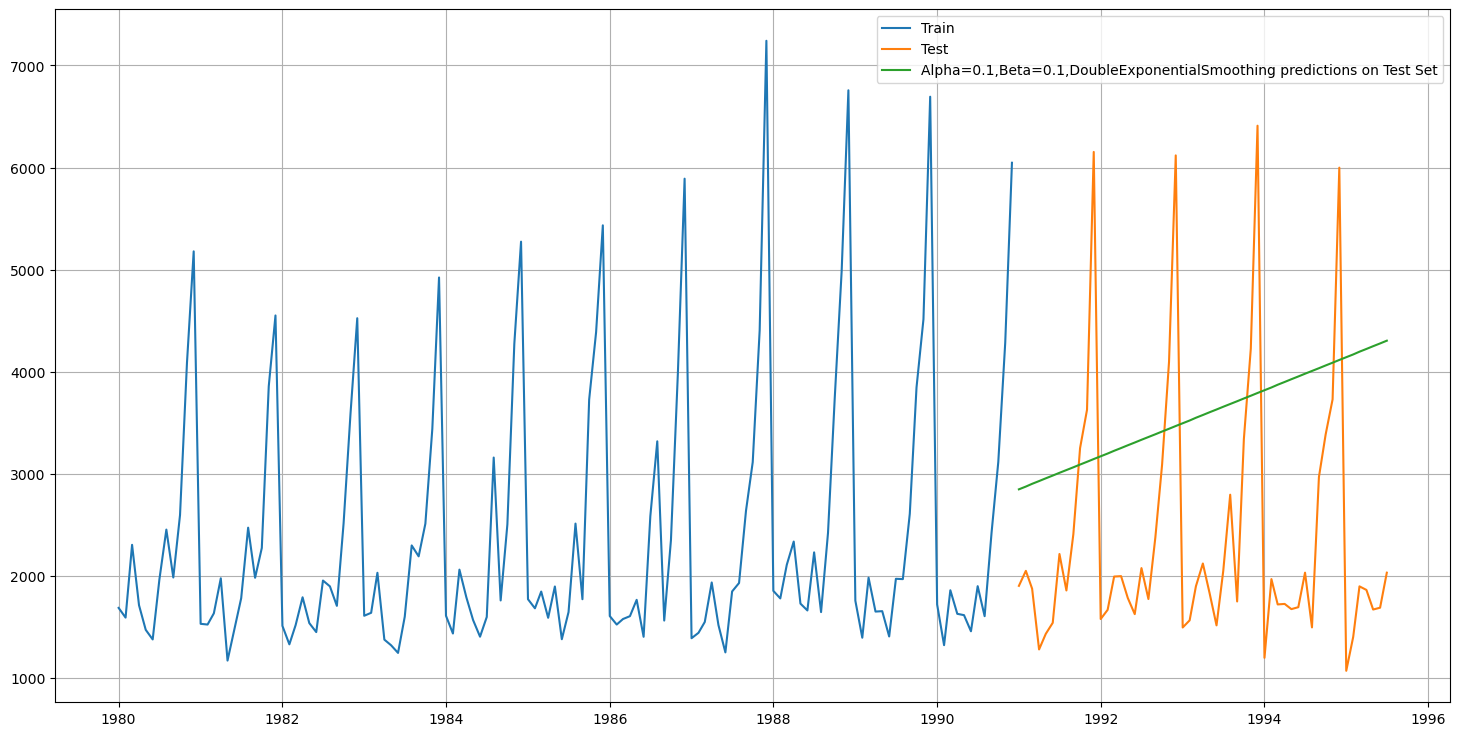

In [141]:
plt.figure(figsize=(18,9))
plt.plot(DES_train_spark['Sparkling'], label='Train')
plt.plot(DES_test_spark['Sparkling'], label='Test')

plt.plot(DES_test_spark['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [142]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE Spark': [resultsDf_7_spark.sort_values(by=['Test RMSE Spark']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
resultsDf_7_1

Test RMSE Spark
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      1777.734773

### Double Exponential Smoothing (Holt's Model) for Rose

In [143]:
DES_train_rose = rose_train_df.copy()
DES_test_rose = rose_test_df.copy()

In [144]:
model_DES_rose = Holt(DES_train_rose['Rose'],initialization_method='estimated')

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [145]:
resultsDf_7_rose = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE Rose':[],'Test RMSE Rose': []})
resultsDf_7_rose

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE Rose, Test RMSE Rose]
Index: []

In [146]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_rose['predict',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test_rose['predict',i,j] = model_DES_rose_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train_rose = metrics.mean_squared_error(DES_train_rose['Rose'],DES_train_rose['predict',i,j],squared=False)
        
        rmse_model6_test_rose = metrics.mean_squared_error(DES_test_rose['Rose'],DES_test_rose['predict',i,j],squared=False)
        
        resultsDf_7_rose = resultsDf_7_rose.append({'Alpha Values':i,'Beta Values':j,'Train RMSE Rose':rmse_model6_train_rose
                                          ,'Test RMSE Rose':rmse_model6_test_rose}, ignore_index=True)


In [147]:
resultsDf_7_rose

Alpha Values  Beta Values  Train RMSE Rose  Test RMSE Rose
0            0.1          0.1        35.120545       36.879551
1            0.1          0.2        33.990798       48.634756
2            0.1          0.3        33.518388       78.126338
3            0.1          0.4        33.495355       99.657343
4            0.1          0.5        33.819101      124.181892
..           ...          ...              ...             ...
95           1.0          0.6        51.833717      801.680218
96           1.0          0.7        54.498417      841.892573
97           1.0          0.8        57.366477      853.965537
98           1.0          0.9        60.474397      834.710935
99           1.0          1.0        63.873750      780.079579

[100 rows x 4 columns]

In [148]:
resultsDf_7_rose.sort_values(by=['Test RMSE Rose']).head()

Alpha Values  Beta Values  Train RMSE Rose  Test RMSE Rose
0            0.1          0.1        35.120545       36.879551
1            0.1          0.2        33.990798       48.634756
10           0.2          0.1        33.274844       65.731724
2            0.1          0.3        33.518388       78.126338
20           0.3          0.1        33.673813       98.653317

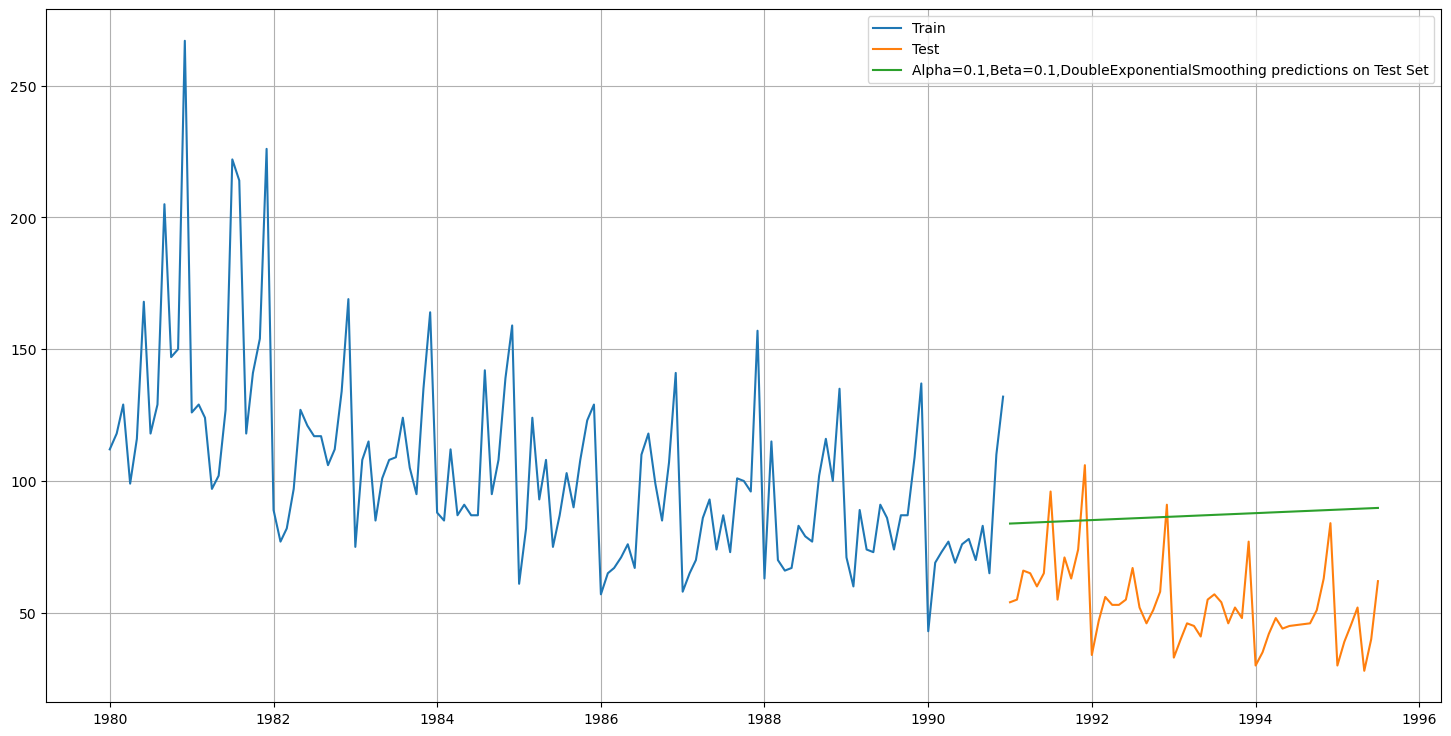

In [149]:
plt.figure(figsize=(18,9))
plt.plot(DES_train_rose['Rose'], label='Train')
plt.plot(DES_test_rose['Rose'], label='Test')

plt.plot(DES_test_rose['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [150]:
resultsDf_7_2 = pd.DataFrame({'Test RMSE Rose': [resultsDf_7_rose.sort_values(by=['Test RMSE Rose']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
resultsDf_7_2

Test RMSE Rose
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.879551

In [151]:
resultsDf8 = resultsDf_7_1.join(resultsDf_7_2, how='outer')
resultsDf8

Test RMSE Spark  Test RMSE Rose
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      1777.734773       36.879551

In [152]:
resultsDf = pd.concat([resultsDf, resultsDf8], axis=0)
resultsDf

Test RMSE Spark  Test RMSE Rose
RegressionOnTime                                   1275.867052       51.433312
SimpleAverageModel                                 1275.081804       53.460570
2pointTrailingMovingAverage                         813.400684       11.529278
4pointTrailingMovingAverage                        1156.589694       14.451403
6pointTrailingMovingAverage                        1283.927428       14.566327
9pointTrailingMovingAverage                        1346.278315       14.727630
Alpha=0.995,SimpleExponentialSmoothing             1316.036300       36.796225
Alpha=0.1,SimpleExponentialSmoothing               1375.393398       36.828033
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      1777.734773       36.879551

### Triple Exponential Smoothing (Holt - Winter's Model) for Sparkling

In [153]:
TES_train_spark = spark_train_df.copy()
TES_test_spark = spark_test_df.copy()

In [154]:
model_TES_spark = ExponentialSmoothing(TES_train_spark['Sparkling'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [155]:
model_TES_spark_autofit = model_TES_spark.fit()

In [156]:
model_TES_spark_autofit.params

{'smoothing_level': 0.1110748487730617,
 'smoothing_trend': 0.04936681558147281,
 'smoothing_seasonal': 0.3621535934241563,
 'damping_trend': nan,
 'initial_level': 2356.5406201207884,
 'initial_trend': -9.182695388447138,
 'initial_seasons': array([0.71352408, 0.68353525, 0.90400334, 0.80568225, 0.6566777 ,
        0.65475452, 0.88660198, 1.1340734 , 0.91920854, 1.21247001,
        1.8684023 , 2.37102072]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [157]:
TES_test_spark['auto_predict'] = model_TES_spark_autofit.forecast(steps=len(TES_test_spark))
TES_test_spark.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1587.845098
1991-02-01       2049   1356.700430
1991-03-01       1874   1763.276346
1991-04-01       1279   1656.519213
1991-05-01       1432   1542.331187

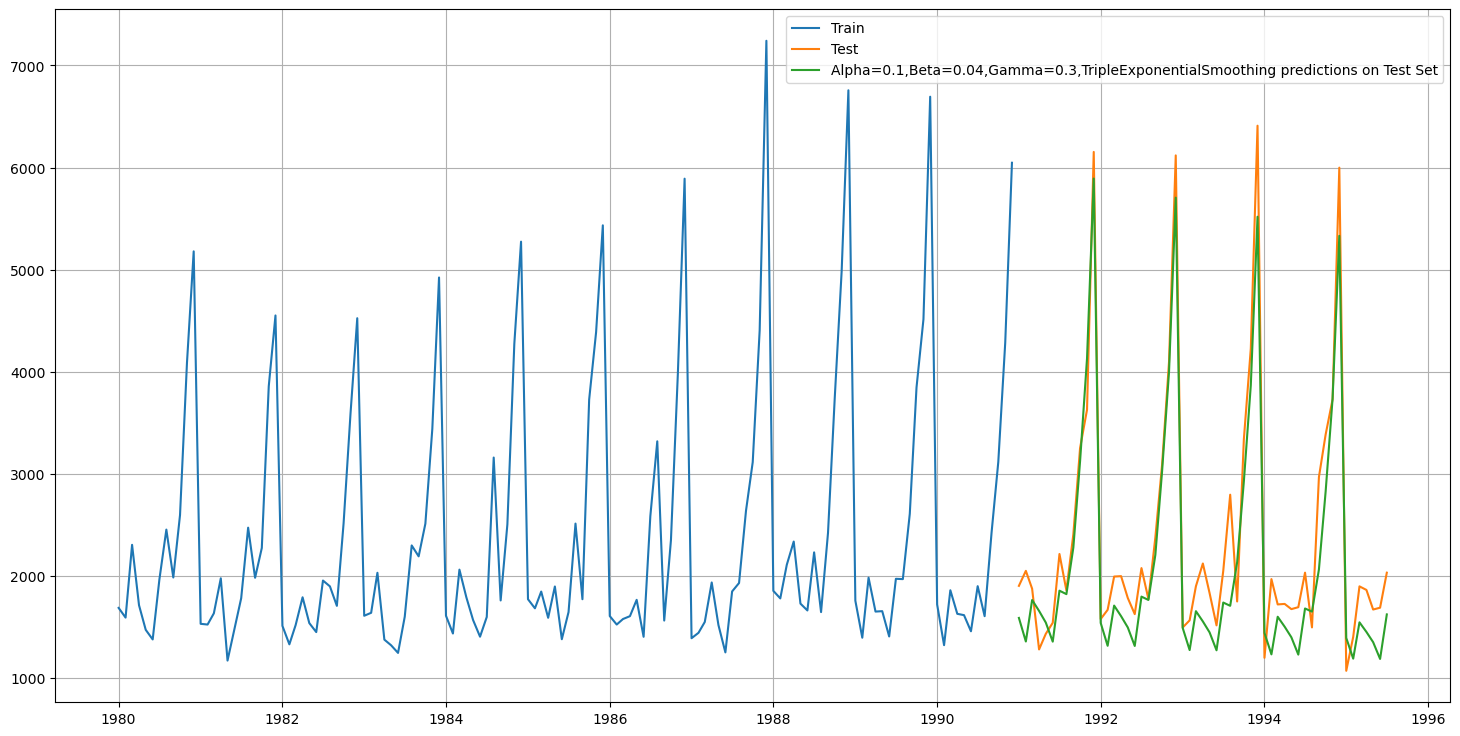

In [158]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_spark['Sparkling'], label='Train')
plt.plot(TES_test_spark['Sparkling'], label='Test')

plt.plot(TES_test_spark['auto_predict'], label='Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [159]:
rmse_model8_test_1_spark = metrics.mean_squared_error(TES_test_spark['Sparkling'],TES_test_spark['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model8_test_1_spark))

For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 403.224


In [160]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE Spark': [rmse_model8_test_1_spark]}
                           ,index=['Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponentialSmoothing'])
resultsDf_8_1

Test RMSE Spark
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...       403.224091

In [161]:
resultsDf_8_spark = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE Spark':[],'Test RMSE Spark': []})
resultsDf_8_spark

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE Spark, Test RMSE Spark]
Index: []

In [162]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_spark_alpha_i_j_k = model_TES_spark.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_spark['predict',i,j,k] = model_TES_spark_alpha_i_j_k.fittedvalues
            TES_test_spark['predict',i,j,k] = model_TES_spark_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train_spark['Sparkling'],TES_train_spark['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test_spark['Sparkling'],TES_test_spark['predict',i,j,k],squared=False)
            
            resultsDf_8_spark = resultsDf_8_spark.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE Spark':rmse_model8_train,'Test RMSE Spark':rmse_model8_test}
                                                 , ignore_index=True)

In [163]:
resultsDf_8_spark

Alpha Values  Beta Values  Gamma Values  Train RMSE Spark  \
0             0.1          0.1           0.1      3.814397e+02   
1             0.1          0.1           0.2      3.677929e+02   
2             0.1          0.1           0.3      3.614334e+02   
3             0.1          0.1           0.4      3.607002e+02   
4             0.1          0.1           0.5      3.644451e+02   
..            ...          ...           ...               ...   
995           1.0          1.0           0.6      1.882994e+05   
996           1.0          1.0           0.7      2.660015e+05   
997           1.0          1.0           0.8      1.101923e+06   
998           1.0          1.0           0.9      7.695708e+04   
999           1.0          1.0           1.0      2.456050e+04   

     Test RMSE Spark  
0       5.910387e+02  
1       6.214407e+02  
2       6.395595e+02  
3       6.447910e+02  
4       6.410980e+02  
..               ...  
995     4.386054e+06  
996     8.649577e+06  
997     2.700435e+05  
998     2.472201e+05  
999     1.256914e+05  

[1000 rows x 5 columns]

In [164]:
resultsDf_8_spark.sort_values(by=['Test RMSE Spark']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE Spark  \
301           0.4          0.1           0.2        384.467709   
211           0.3          0.2           0.2        388.544148   
200           0.3          0.1           0.1        388.220071   
110           0.2          0.2           0.1        398.482510   
402           0.5          0.1           0.3        396.598057   

     Test RMSE Spark  
301       317.434302  
211       329.037543  
200       337.080969  
110       340.186457  
402       345.913415

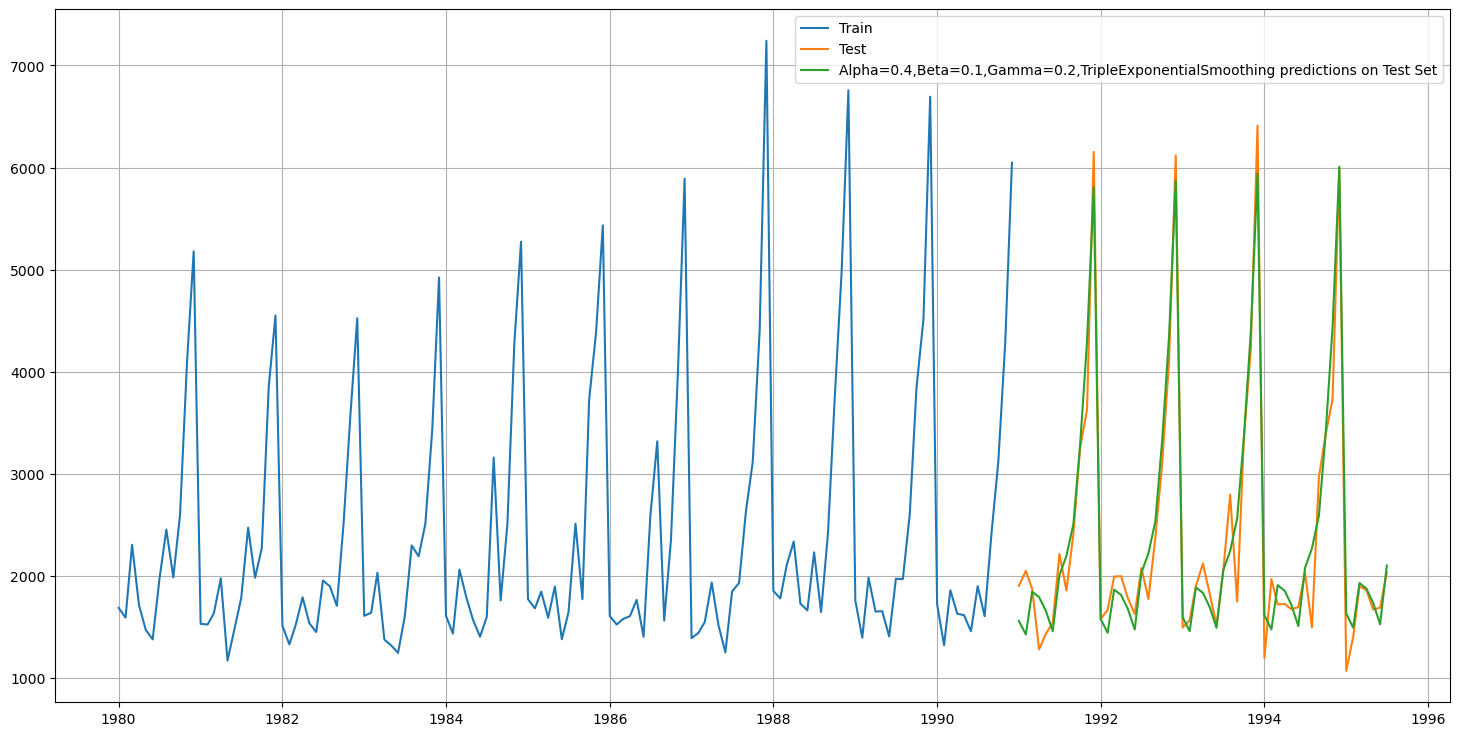

In [165]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_spark['Sparkling'], label='Train')
plt.plot(TES_test_spark['Sparkling'], label='Test')


plt.plot(TES_test_spark['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [166]:
resultsDf_8_3_spark = pd.DataFrame({'Test RMSE Spark': [resultsDf_8_spark.sort_values(by=['Test RMSE Spark']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

In [167]:
resultsDf_8_3_spark

Test RMSE Spark
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...       317.434302

### Triple Exponential Smoothing (Holt - Winter's Model) for Rose

In [168]:
TES_train_rose = rose_train_df.copy()
TES_test_rose = rose_test_df.copy()

In [169]:
model_TES_rose = ExponentialSmoothing(TES_train_rose['Rose'],trend='add',seasonal='multiplicative',initialization_method='estimated')

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [170]:
model_TES_rose_autofit = model_TES_rose.fit()

In [171]:
model_TES_rose_autofit.params

{'smoothing_level': 0.07153631472561377,
 'smoothing_trend': 0.04527023398503556,
 'smoothing_seasonal': 3.818336696069977e-06,
 'damping_trend': nan,
 'initial_level': 143.5423523467943,
 'initial_trend': -0.8581007584190545,
 'initial_seasons': array([0.78286311, 0.88791935, 0.97056057, 0.84829191, 0.95397452,
        1.0388937 , 1.1424519 , 1.21626773, 1.15099268, 1.1272936 ,
        1.31413857, 1.81189073]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [172]:
TES_test_rose['auto_predict'] = model_TES_rose_autofit.forecast(steps=len(TES_test_rose))
TES_test_rose.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.318076
1991-02-01  55.0     63.672328
1991-03-01  66.0     69.376056
1991-04-01  65.0     60.441921
1991-05-01  60.0     67.753220

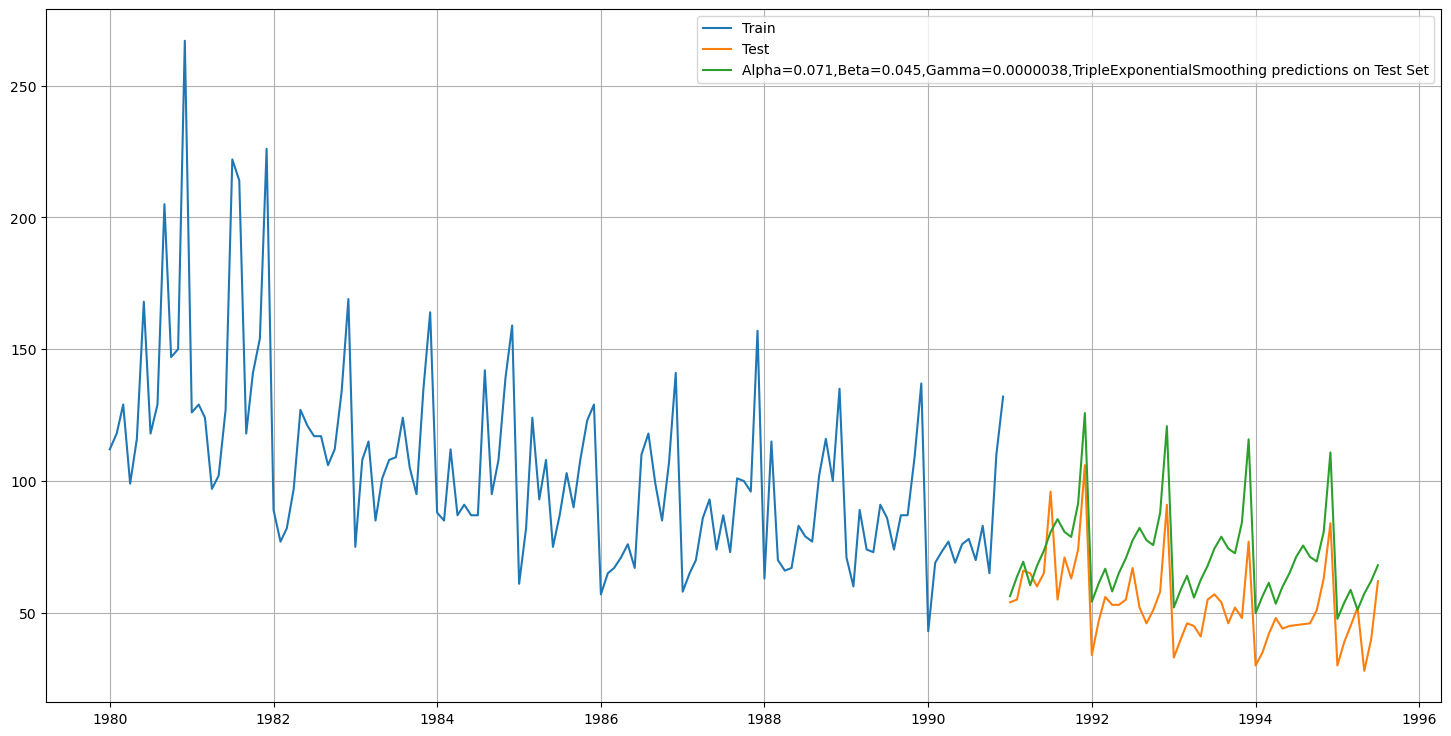

In [173]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_rose['Rose'], label='Train')
plt.plot(TES_test_rose['Rose'], label='Test')

plt.plot(TES_test_rose['auto_predict'], label='Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [174]:
rmse_model8_test_1_rose = metrics.mean_squared_error(TES_test_rose['Rose'],TES_test_rose['auto_predict'],squared=False)
print("For Alpha=0.071,Beta=0.045,Gamma=0.0000038, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model8_test_1_rose))

For Alpha=0.071,Beta=0.045,Gamma=0.0000038, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.154


In [175]:
resultsDf_8_1_rose = pd.DataFrame({'Test RMSE Rose': [rmse_model8_test_1_rose]}
                           ,index=['Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleExponentialSmoothing'])
resultsDf_8_1_rose

Test RMSE Rose
Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleEx...       20.153704

In [176]:
resultsDf_8_rose = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE Rose':[],'Test RMSE Rose': []})
resultsDf_8_rose

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE Rose, Test RMSE Rose]
Index: []

In [177]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_rose_alpha_i_j_k = model_TES_rose.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_rose['predict',i,j,k] = model_TES_rose_alpha_i_j_k.fittedvalues
            TES_test_rose['predict',i,j,k] = model_TES_rose_alpha_i_j_k.forecast(steps=55)
            

        
            rmse_model8_train_rose = metrics.mean_squared_error(TES_train_rose['Rose'],TES_train_spark['predict',i,j,k],squared=False)
            
            rmse_model8_test_rose = metrics.mean_squared_error(TES_test_rose['Rose'],TES_test_spark['predict',i,j,k],squared=False)
            
            resultsDf_8_rose = resultsDf_8_rose.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE Rose':rmse_model8_train_rose,'Test RMSE Rose':rmse_model8_test_rose}
                                                 , ignore_index=True)

In [178]:
resultsDf_8_rose

Alpha Values  Beta Values  Gamma Values  Train RMSE Rose  Test RMSE Rose
0             0.1          0.1           0.1     2.522385e+03    2.195938e+03
1             0.1          0.1           0.2     2.543419e+03    2.154762e+03
2             0.1          0.1           0.3     2.561720e+03    2.138871e+03
3             0.1          0.1           0.4     2.577997e+03    2.139446e+03
4             0.1          0.1           0.5     2.592807e+03    2.148934e+03
..            ...          ...           ...              ...             ...
995           1.0          1.0           0.6     1.888183e+05    4.384692e+06
996           1.0          1.0           0.7     2.664138e+05    8.649387e+06
997           1.0          1.0           0.8     1.101840e+06    2.694947e+05
998           1.0          1.0           0.9     7.681794e+04    2.487597e+05
999           1.0          1.0           1.0     2.391113e+04    1.271176e+05

[1000 rows x 5 columns]

In [179]:
resultsDf_8_rose.sort_values(by=['Test RMSE Rose']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE Rose  Test RMSE Rose
78            0.1          0.8           0.9      2643.813465      982.337510
244           0.3          0.5           0.5      2553.581706      985.851409
48            0.1          0.5           0.9      2643.184178     1005.196902
39            0.1          0.4           1.0      2663.005806     1005.592069
47            0.1          0.5           0.8      2630.259863     1006.316775

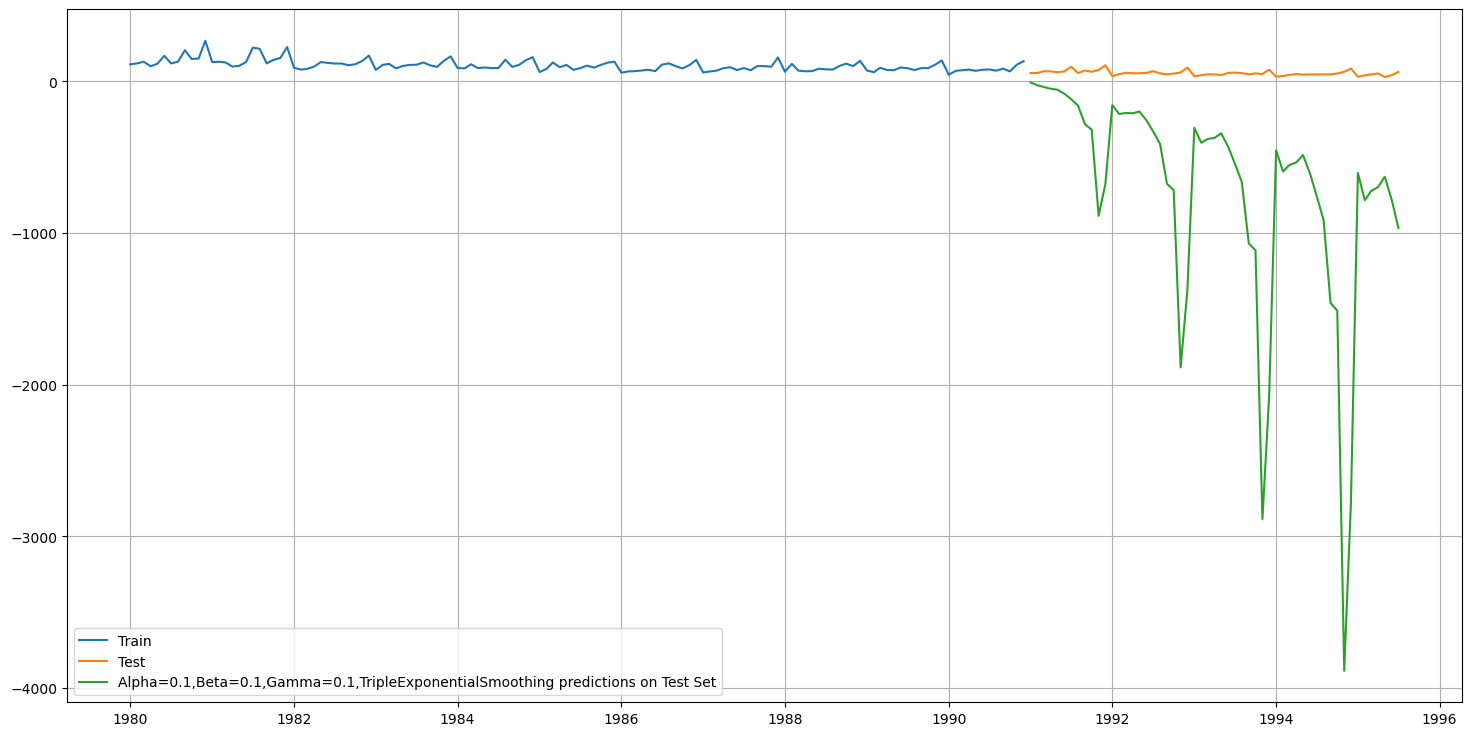

In [180]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_rose['Rose'], label='Train')
plt.plot(TES_test_rose['Rose'], label='Test')


plt.plot(TES_test_rose['predict', 0.1, 0.8, 0.9], label='Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [181]:
resultsDf_8_3_rose = pd.DataFrame({'Test RMSE Rose': [resultsDf_8_rose.sort_values(by=['Test RMSE Rose']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialSmoothing'])

In [182]:
resultsDf_8_3_rose

Test RMSE Rose
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...       982.33751

In [183]:
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE Spark  \
RegressionOnTime                                        1275.867052   
SimpleAverageModel                                      1275.081804   
2pointTrailingMovingAverage                              813.400684   
4pointTrailingMovingAverage                             1156.589694   
6pointTrailingMovingAverage                             1283.927428   
9pointTrailingMovingAverage                             1346.278315   
Alpha=0.995,SimpleExponentialSmoothing                  1316.036300   
Alpha=0.1,SimpleExponentialSmoothing                    1375.393398   
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing           1777.734773   
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...       403.224091   

                                                    Test RMSE Rose  
RegressionOnTime                                         51.433312  
SimpleAverageModel                                       53.460570  
2pointTrailingMovingAverage                              11.529278  
4pointTrailingMovingAverage                              14.451403  
6pointTrailingMovingAverage                              14.566327  
9pointTrailingMovingAverage                              14.727630  
Alpha=0.995,SimpleExponentialSmoothing                   36.796225  
Alpha=0.1,SimpleExponentialSmoothing                     36.828033  
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing            36.879551  
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...             NaN

In [184]:
resultsDf = pd.concat([resultsDf, resultsDf_8_1_rose])
resultsDf

Test RMSE Spark  \
RegressionOnTime                                        1275.867052   
SimpleAverageModel                                      1275.081804   
2pointTrailingMovingAverage                              813.400684   
4pointTrailingMovingAverage                             1156.589694   
6pointTrailingMovingAverage                             1283.927428   
9pointTrailingMovingAverage                             1346.278315   
Alpha=0.995,SimpleExponentialSmoothing                  1316.036300   
Alpha=0.1,SimpleExponentialSmoothing                    1375.393398   
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing           1777.734773   
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...       403.224091   
Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleEx...              NaN   

                                                    Test RMSE Rose  
RegressionOnTime                                         51.433312  
SimpleAverageModel                                       53.460570  
2pointTrailingMovingAverage                              11.529278  
4pointTrailingMovingAverage                              14.451403  
6pointTrailingMovingAverage                              14.566327  
9pointTrailingMovingAverage                              14.727630  
Alpha=0.995,SimpleExponentialSmoothing                   36.796225  
Alpha=0.1,SimpleExponentialSmoothing                     36.828033  
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing            36.879551  
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...             NaN  
Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleEx...       20.153704

In [185]:
resultsDf = pd.concat([resultsDf, resultsDf_8_3_spark]) 
resultsDf

Test RMSE Spark  \
RegressionOnTime                                        1275.867052   
SimpleAverageModel                                      1275.081804   
2pointTrailingMovingAverage                              813.400684   
4pointTrailingMovingAverage                             1156.589694   
6pointTrailingMovingAverage                             1283.927428   
9pointTrailingMovingAverage                             1346.278315   
Alpha=0.995,SimpleExponentialSmoothing                  1316.036300   
Alpha=0.1,SimpleExponentialSmoothing                    1375.393398   
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing           1777.734773   
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...       403.224091   
Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleEx...              NaN   
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...       317.434302   

                                                    Test RMSE Rose  
RegressionOnTime                                         51.433312  
SimpleAverageModel                                       53.460570  
2pointTrailingMovingAverage                              11.529278  
4pointTrailingMovingAverage                              14.451403  
6pointTrailingMovingAverage                              14.566327  
9pointTrailingMovingAverage                              14.727630  
Alpha=0.995,SimpleExponentialSmoothing                   36.796225  
Alpha=0.1,SimpleExponentialSmoothing                     36.828033  
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing            36.879551  
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...             NaN  
Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleEx...       20.153704  
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...             NaN

In [186]:
resultsDf = pd.concat([resultsDf, resultsDf_8_3_rose])
resultsDf

Test RMSE Spark  \
RegressionOnTime                                        1275.867052   
SimpleAverageModel                                      1275.081804   
2pointTrailingMovingAverage                              813.400684   
4pointTrailingMovingAverage                             1156.589694   
6pointTrailingMovingAverage                             1283.927428   
9pointTrailingMovingAverage                             1346.278315   
Alpha=0.995,SimpleExponentialSmoothing                  1316.036300   
Alpha=0.1,SimpleExponentialSmoothing                    1375.393398   
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing           1777.734773   
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...       403.224091   
Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleEx...              NaN   
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...       317.434302   
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...              NaN   

                                                    Test RMSE Rose  
RegressionOnTime                                         51.433312  
SimpleAverageModel                                       53.460570  
2pointTrailingMovingAverage                              11.529278  
4pointTrailingMovingAverage                              14.451403  
6pointTrailingMovingAverage                              14.566327  
9pointTrailingMovingAverage                              14.727630  
Alpha=0.995,SimpleExponentialSmoothing                   36.796225  
Alpha=0.1,SimpleExponentialSmoothing                     36.828033  
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing            36.879551  
Alpha=0.1,Beta=0.04,Gamma=0.3,TripleExponential...             NaN  
Alpha=0.071,Beta=0.045,Gamma=0.0000038,TripleEx...       20.153704  
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...             NaN  
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...      982.337510

### Check Stationarity of SPARKLING Data
The Augmented Dickey-Fuller test is used to check the stationarity of given dataset.

The hypothesis for the ADF test is:

H0 : The Time Series is non-stationary.
H1 : The Time Series is stationary.
We would want the series to be stationary for building ARIMA models. We evaluate p-value = 0.05

In [187]:
from statsmodels.tsa.stattools import adfuller

In [188]:
spark_df_ad = adfuller(spark_df,regression='ct')
print('DF test statistic is %3.3f' %spark_df_ad[0])
print('DF test p-value is' ,spark_df_ad[1])
print('Number of lags used' ,spark_df_ad[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932566
Number of lags used 12


p-value is greater than 0.05 thus we fail to reject null-hypothesis. 

This time series is not stationary

by applying the differencing, we will stationarize the dataset

In [189]:
spark_df_ad = adfuller(spark_df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %spark_df_ad[0])
print('DF test p-value is' , spark_df_ad[1])
print('Number of lags used' , spark_df_ad[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


p-value is lesser than 0.05 thus we reject the null-hypothesis. 

now the dataset is stationary after 1-level differencing

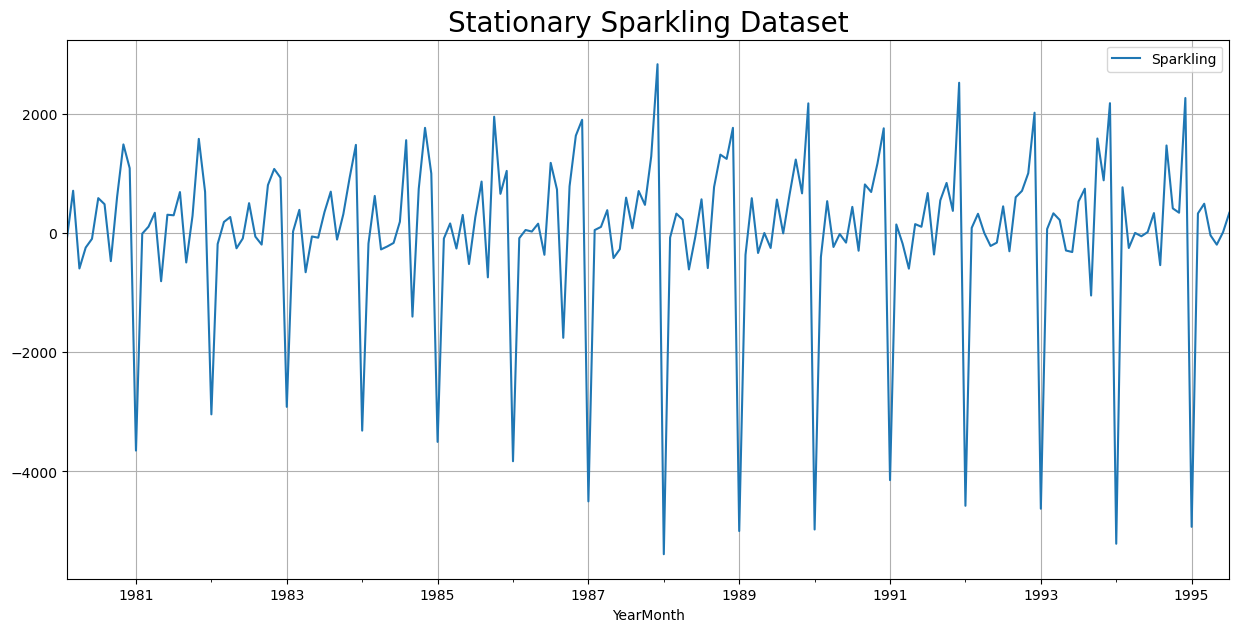

In [190]:
spark_df.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Dataset', fontsize=20);

### Check Stationarity of Rose Data
The Augmented Dickey-Fuller test is used to check the stationarity of given dataset.

The hypothesis for the ADF test is:

H0 : The Time Series is non-stationary.
H1 : The Time Series is stationary.
We would want the series to be stationary for building ARIMA models. We evaluate p-value = 0.05

In [191]:
rose_df_ad = adfuller(rose_df,regression='ct')
print('DF test statistic is %3.3f' %rose_df_ad[0])
print('DF test p-value is' ,rose_df_ad[1])
print('Number of lags used' ,rose_df_ad[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793138
Number of lags used 13


p-value is greater than 0.05 thus we fail to reject null-hypothesis. 

This time series is not stationary

by applying the differencing, we will stationarize the dataset

In [192]:
rose_df_ad = adfuller(rose_df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %rose_df_ad[0])
print('DF test p-value is' , rose_df_ad[1])
print('Number of lags used' , rose_df_ad[2])

DF test statistic is -8.162
DF test p-value is 3.0159761158276584e-11
Number of lags used 12


p-value is lesser than 0.05 thus we reject the null-hypothesis. 

now the dataset is stationary after 1-level differencing

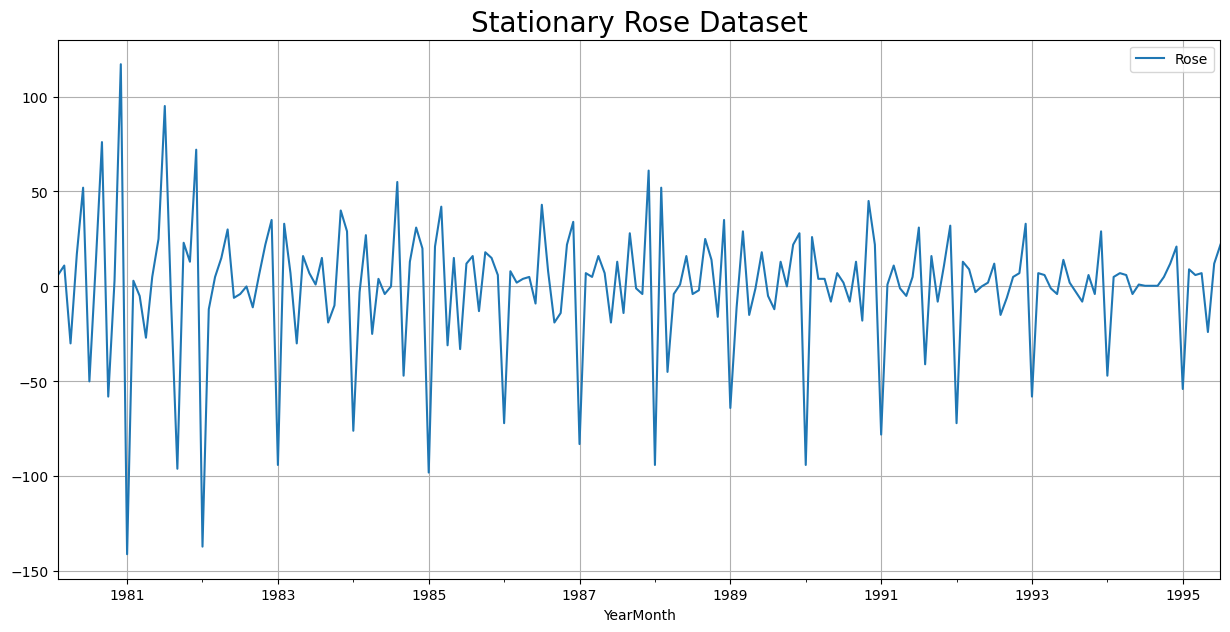

In [193]:
rose_df.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Dataset', fontsize=20);

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Auto Regressive(AR) Models for Sparkling

* We observe trend and seasonality of the observations.

* Performing differencing (d=1) on the original time series

Text(0, 0.5, 'Differenced (Sparkling)')

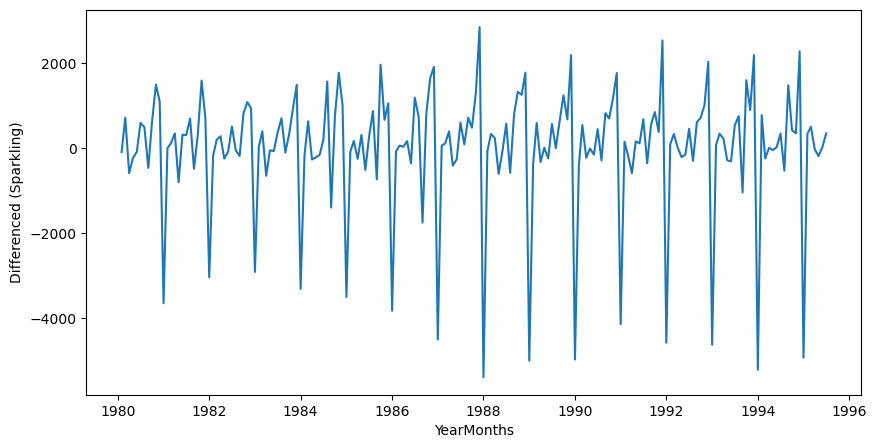

In [194]:
plt.figure(figsize=(10, 5))
plt.plot(spark_df.diff(periods=1))
plt.xlabel('YearMonths')
plt.ylabel('Differenced (Sparkling)')

#### Using the method(Lowest AIC) to compare different orders of 'p'. Since ARIMA requires p, q, d. We shall build the range values to obtain the lowest AIC score

In [195]:
p= range(1,4)

In [196]:
q= range(1, 4)

In [197]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import itertools

In [198]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, d ,q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [199]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [200]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [201]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [202]:
best_aic_spark = np.inf
best_pdq_spark = None
best_seasonal_pdq_spark = None
temp_model_spark = None

#### <u>AR Model building to estimate best 'p' ( Lowest AIC Approach )</u>

In [203]:
AR_AIC_spark = pd.DataFrame(columns=['param', 'AIC Spark'])
AR_AIC_spark

Empty DataFrame
Columns: [param, AIC Spark]
Index: []

In [204]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model_spark = ARIMA(spark_train_df.diff(),order=param).fit()
    print('ARIMA{} - AIC Spark:{}'.format(param,ARIMA_model_spark.aic))
    AR_AIC_spark = AR_AIC_spark.append({'param':param, 'AIC Spark': ARIMA_model_spark.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC Spark:2268.5320738630644
ARIMA(2, 0, 0) - AIC Spark:2262.053533195901
ARIMA(3, 0, 0) - AIC Spark:2259.516500229305


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

In [205]:
AR_AIC_spark.sort_values(by='AIC Spark',ascending=True).head()

param    AIC Spark
2  (3, 0, 0)  2259.516500
1  (2, 0, 0)  2262.053533
0  (1, 0, 0)  2268.532074

#### <u>Building AR model with best <font color='blue'>'p'</font> parameter </u>

In [206]:
best_model_spark = ARIMA(spark_train_df.diff(),order = (3,0,0))#p=2 with lowest AIC 
best_results_spark = best_model_spark.fit()

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [207]:
print(best_results_spark.summary().tables[0])
print(best_results_spark.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1124.758
Date:                Mon, 05 Aug 2024   AIC                           2259.517
Time:                        18:26:44   BIC                           2273.931
Sample:                    01-01-1980   HQIC                          2265.374
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2898    105.491      0.316      0.752    -173.468     240.048
ar.L1         -0.2418      0.129     -1.870      0.062      -0.495       0.012
ar.L2         -0.2895      0.121     -2.403      0.0

#### <u>Calculating RMSE for best AR model </u>

In [208]:
pred_dynamic_spark = best_results_spark.predict(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [209]:
print(pred_dynamic_spark)

1991-01-01   -835.795824
Freq: MS, dtype: float64


In [210]:
pred99_spark = best_results_spark.get_forecast(steps=len(spark_test_df), alpha=0.1)#forecasting values 

In [211]:
print(pred99_spark.tvalues)

1991-01-01   -0.639195
1991-02-01   -0.347579
1991-03-01    0.062118
1991-04-01    0.236662
1991-05-01    0.028785
1991-06-01   -0.045310
1991-07-01    0.000141
1991-08-01    0.048791
1991-09-01    0.037603
1991-10-01    0.017799
1991-11-01    0.016805
1991-12-01    0.024853
1992-01-01    0.026867
1992-02-01    0.024234
1992-03-01    0.022795
1992-04-01    0.023532
1992-05-01    0.024259
1992-06-01    0.024136
1992-07-01    0.023819
1992-08-01    0.023796
1992-09-01    0.023916
1992-10-01    0.023953
1992-11-01    0.023913
1992-12-01    0.023890
1993-01-01    0.023900
1993-02-01    0.023912
1993-03-01    0.023911
1993-04-01    0.023906
1993-05-01    0.023905
1993-06-01    0.023907
1993-07-01    0.023908
1993-08-01    0.023907
1993-09-01    0.023907
1993-10-01    0.023907
1993-11-01    0.023907
1993-12-01    0.023907
1994-01-01    0.023907
1994-02-01    0.023907
1994-03-01    0.023907
1994-04-01    0.023907
1994-05-01    0.023907
1994-06-01    0.023907
1994-07-01    0.023907
1994-08-01 

In [212]:
from sklearn.metrics import mean_squared_error
rmse_arima_spark = np.sqrt(mean_squared_error(spark_test_df['Sparkling'],pred99_spark.predicted_mean))

In [213]:
print("RMSE for ARIMA Sparkling ",rmse_arima_spark)

RMSE for ARIMA Sparkling  2706.9632077679607


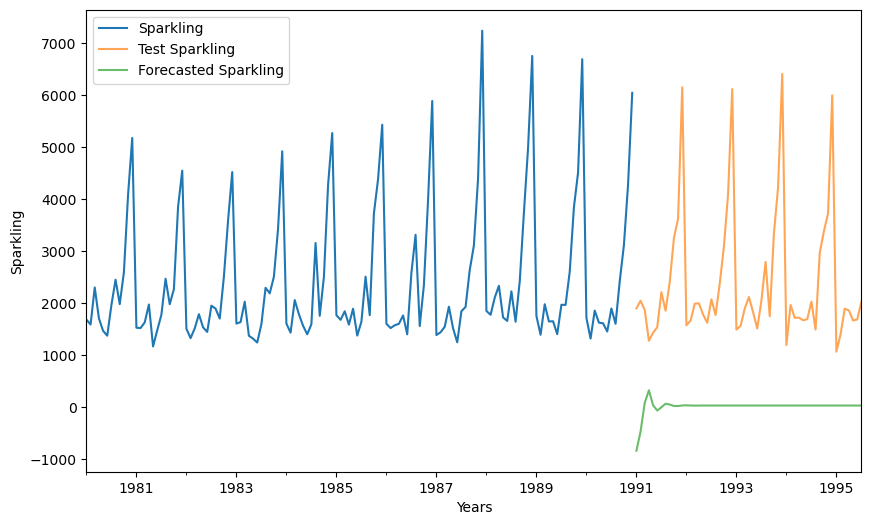

In [214]:
axis = spark_train_df['Sparkling'].plot(label='Sparkling', figsize=(10, 6))
spark_test_df['Sparkling'].plot(ax=axis, label='Test Sparkling', alpha=0.7)
pred99_spark.predicted_mean.plot(ax=axis, label='Forecasted Sparkling', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

### Arima Model is not giving better result

#### <u>AR Model building to estimate best 'p' ( Lowest AIC Approach ) for Rose </u>

In [215]:
AR_AIC_rose = pd.DataFrame(columns=['param', 'AIC Rose'])
AR_AIC_rose

Empty DataFrame
Columns: [param, AIC Rose]
Index: []

In [216]:
for param in pdq_ar:
    ARIMA_model_rose = ARIMA(rose_train_df.diff(),order=param).fit()
    print('ARIMA{} - AIC Rose:{}'.format(param,ARIMA_model_rose.aic))
    AR_AIC_rose = AR_AIC_rose.append({'param':param, 'AIC Rose': ARIMA_model_rose.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC Rose:1319.3483124657055
ARIMA(2, 0, 0) - AIC Rose:1300.6092612124924
ARIMA(3, 0, 0) - AIC Rose:1299.4787394711298


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

In [217]:
AR_AIC_rose.sort_values(by='AIC Rose',ascending=True).head()

param     AIC Rose
2  (3, 0, 0)  1299.478739
1  (2, 0, 0)  1300.609261
0  (1, 0, 0)  1319.348312

#### <u>Building AR model with best <font color='blue'>'p'</font> parameter </u>

In [218]:
best_model_rose = ARIMA(rose_train_df.diff(),order = (3,0,0))#p=2 with lowest AIC 
best_results_rose = best_model_rose.fit()

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [219]:
print(best_results_rose.summary().tables[0])
print(best_results_rose.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -644.739
Date:                Mon, 05 Aug 2024   AIC                           1299.479
Time:                        18:26:45   BIC                           1313.893
Sample:                    01-01-1980   HQIC                          1305.336
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0589      1.507     -0.039      0.969      -3.013       2.895
ar.L1         -0.5557      0.073     -7.576      0.000      -0.700      -0.412
ar.L2         -0.4612      0.085     -5.452      0.0

#### <u>Calculating RMSE for best AR model </u>

In [220]:
pred_dynamic_rose = best_results_rose.predict(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [221]:
pred99_rose = best_results_spark.get_forecast(steps=len(spark_test_df), alpha=0.1)#forecasting values 

In [222]:
from sklearn.metrics import mean_squared_error
rmse_arima_rose = np.sqrt(mean_squared_error(rose_test_df['Rose'],pred99_rose.predicted_mean))

In [223]:
print("The RMSE for Rose",rmse_arima_rose)

The RMSE for Rose 146.97065609783894


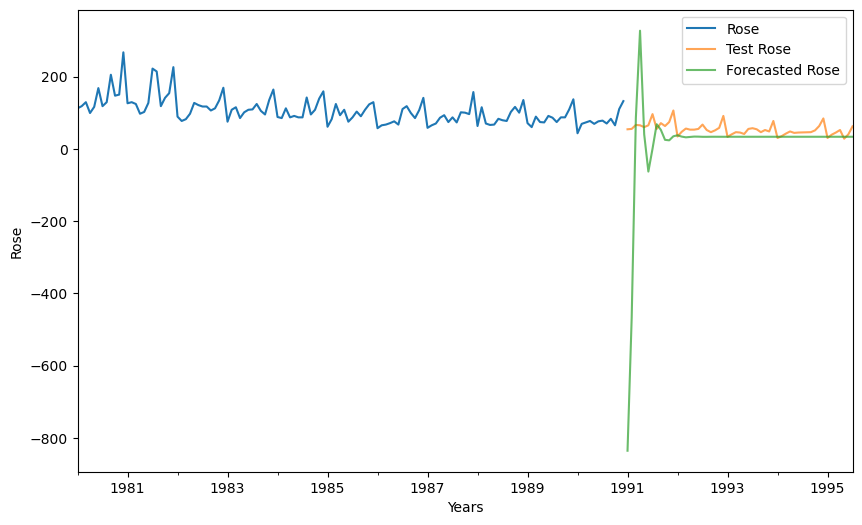

In [224]:
axis = rose_train_df['Rose'].plot(label='Rose', figsize=(10, 6))
rose_test_df['Rose'].plot(ax=axis, label='Test Rose', alpha=0.7)
pred99_rose.predicted_mean.plot(ax=axis, label='Forecasted Rose', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

### ARIMA model for Sparkling data

In [225]:
ARMA_AIC_spark = pd.DataFrame(columns=['param', 'AIC Spark'])
ARMA_AIC_spark

Empty DataFrame
Columns: [param, AIC Spark]
Index: []

In [226]:
for param in pdq_arma:
    ARIMA_model_spark = ARIMA(spark_train_df['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC Spark:{}'.format(param,ARIMA_model_spark.aic))
    ARMA_AIC_spark =ARMA_AIC_spark.append({'param':param, 'AIC Spark': ARIMA_model_spark.aic}, ignore_index=True)

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

ARIMA(1, 0, 1) - AIC Spark:2246.0053997283367
ARIMA(1, 0, 2) - AIC Spark:2246.9357004523335
ARIMA(1, 0, 3) - AIC Spark:2242.106123411204
ARIMA(1, 1, 1) - AIC Spark:2235.755094685246
ARIMA(1, 1, 2) - AIC Spark:2234.52720045187


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

ARIMA(1, 1, 3) - AIC Spark:2235.607804764403
ARIMA(2, 0, 1) - AIC Spark:2236.5908601573174
ARIMA(2, 0, 2) - AIC Spark:2248.277280694395


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mode

ARIMA(2, 0, 3) - AIC Spark:2205.6942319422483
ARIMA(2, 1, 1) - AIC Spark:2233.777626118394
ARIMA(2, 1, 2) - AIC Spark:2213.509212517864


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mode

ARIMA(2, 1, 3) - AIC Spark:2232.864404466148
ARIMA(3, 0, 1) - AIC Spark:2248.562804183015
ARIMA(3, 0, 2) - AIC Spark:2235.1761150254983


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mode

ARIMA(3, 0, 3) - AIC Spark:2209.2626841660112
ARIMA(3, 1, 1) - AIC Spark:2235.498608667059
ARIMA(3, 1, 2) - AIC Spark:2230.760264325568
ARIMA(3, 1, 3) - AIC Spark:2221.4542846581617


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604

In [227]:
ARMA_AIC_spark.sort_values(by='AIC Spark',ascending=True).head()

param    AIC Spark
8   (2, 0, 3)  2205.694232
14  (3, 0, 3)  2209.262684
10  (2, 1, 2)  2213.509213
17  (3, 1, 3)  2221.454285
16  (3, 1, 2)  2230.760264

In [228]:
best_model_spark = ARIMA(spark_train_df['Sparkling'],order = (2,0,3))
best_results_spark = best_model_spark.fit()

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [229]:
print(best_results_spark.summary().tables[0])
print(best_results_spark.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1095.847
Date:                Mon, 05 Aug 2024   AIC                           2205.694
Time:                        18:26:47   BIC                           2225.874
Sample:                    01-01-1980   HQIC                          2213.894
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2403.6887    126.518     18.999      0.000    2155.718    2651.660
ar.L1          1.7085      0.046     37.520      0.000       1.619       1.798
ar.L2         -0.9733      0.045    -21.418      0.0

In [230]:
pred_dynamic_spark = best_results_spark.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [231]:
pred99_spark = best_results_spark.get_forecast(steps=len(spark_test_df), alpha=0.1)

In [232]:
sparkling_ts_forecasted = pred_dynamic_spark.predicted_mean
testCopy1 = spark_test_df.copy()
testCopy1['sparkling_ts_forecasted'] = pred99_spark.predicted_mean

In [233]:
mse = ((testCopy1['Sparkling'] - testCopy1['sparkling_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1028.619


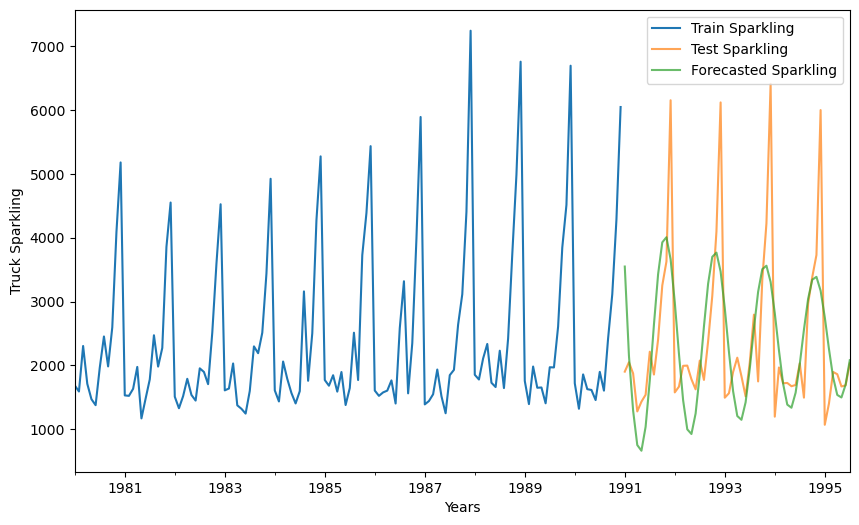

In [234]:
axis = spark_train_df['Sparkling'].plot(label='Train Sparkling', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sparkling', alpha=0.7)
testCopy1['sparkling_ts_forecasted'].plot(ax=axis, label='Forecasted Sparkling', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [235]:
ARMA_AIC_rose = pd.DataFrame(columns=['param', 'AIC Rose'])
ARMA_AIC_rose

Empty DataFrame
Columns: [param, AIC Rose]
Index: []

In [236]:
for param in pdq_arma:
    ARIMA_model_rose = ARIMA(rose_train_df['Rose'],order=param).fit()
    print('ARIMA{} - AIC Rose:{}'.format(param,ARIMA_model_rose.aic))
    ARMA_AIC_rose =ARMA_AIC_rose.append({'param':param, 'AIC Rose': ARIMA_model_rose.aic}, ignore_index=True)

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

ARIMA(1, 0, 1) - AIC Rose:1294.5105853006476
ARIMA(1, 0, 2) - AIC Rose:1292.0532131092718
ARIMA(1, 0, 3) - AIC Rose:1292.9290105411665


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

ARIMA(1, 1, 1) - AIC Rose:1280.5742295380069
ARIMA(1, 1, 2) - AIC Rose:1279.8707234231924
ARIMA(1, 1, 3) - AIC Rose:1281.870722330997
ARIMA(2, 0, 1) - AIC Rose:1292.9371947757027


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

ARIMA(2, 0, 2) - AIC Rose:1292.2480559969504
ARIMA(2, 0, 3) - AIC Rose:1294.2482316370842
ARIMA(2, 1, 1) - AIC Rose:1281.5078621868606


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mode

ARIMA(2, 1, 2) - AIC Rose:1281.8707222264425
ARIMA(2, 1, 3) - AIC Rose:1274.6954211426873


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mode

ARIMA(3, 0, 1) - AIC Rose:1293.8830004749625
ARIMA(3, 0, 2) - AIC Rose:1294.2479147283539


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mode

ARIMA(3, 0, 3) - AIC Rose:1290.9132357357546
ARIMA(3, 1, 1) - AIC Rose:1282.4192776271984
ARIMA(3, 1, 2) - AIC Rose:1283.7207405977151


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

ARIMA(3, 1, 3) - AIC Rose:1278.6610976791044


/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [237]:
ARMA_AIC_rose.sort_values(by='AIC Rose',ascending=True).head()

param     AIC Rose
11  (2, 1, 3)  1274.695421
17  (3, 1, 3)  1278.661098
4   (1, 1, 2)  1279.870723
3   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862

In [238]:
best_model_rose = ARIMA(rose_train_df['Rose'],order = (2,0,3))
best_results_rose = best_model_rose.fit()

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [239]:
print(best_results_rose.summary().tables[0])
print(best_results_rose.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -640.124
Date:                Mon, 05 Aug 2024   AIC                           1294.248
Time:                        18:26:49   BIC                           1314.428
Sample:                    01-01-1980   HQIC                          1302.448
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.7255     24.814      4.341      0.000      59.091     156.360
ar.L1          0.5294      0.835      0.634      0.526      -1.108       2.166
ar.L2          0.4495      0.826      0.544      0.5

In [240]:
pred_dynamic_rose = best_results_rose.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [241]:
pred99_rose = best_results_rose.get_forecast(steps=len(rose_test_df), alpha=0.1)

In [242]:
rose_ts_forecasted = pred_dynamic_rose.predicted_mean
testCopy1 = rose_test_df.copy()
testCopy1['rose_ts_forecasted'] = pred99_rose.predicted_mean

In [243]:
mse = ((testCopy1['Rose'] - testCopy1['rose_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 45.215


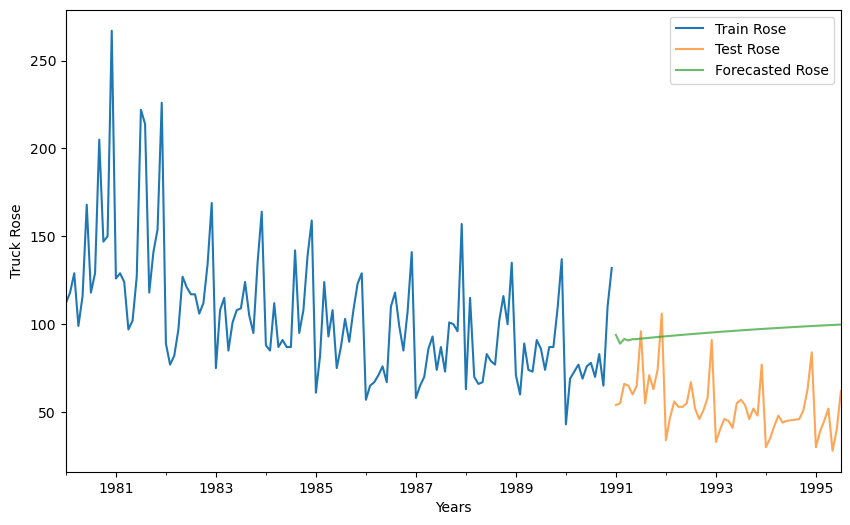

In [244]:
axis = rose_train_df['Rose'].plot(label='Train Rose', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Rose', alpha=0.7)
testCopy1['rose_ts_forecasted'].plot(ax=axis, label='Forecasted Rose', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Rose')
plt.legend(loc='best')
plt.show()
plt.close()